In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 读取2021年的数据文件
year = 2021
file_path = f'morans_data/{year}/basicincident_processed_{year}.csv'
df = pd.read_csv(file_path)

# 自定义PROP_USE分类映射
prop_use_categories = {
    '111': 'Assembly', '112': 'Assembly', '113': 'Assembly', '114': 'Assembly',
    '115': 'Assembly', '116': 'Assembly', '110': 'Assembly', '121': 'Assembly',
    '122': 'Assembly', '123': 'Assembly', '124': 'Assembly', '129': 'Assembly',
    '120': 'Assembly', '131': 'Assembly', '134': 'Assembly', '130': 'Assembly',
    '141': 'Assembly', '142': 'Assembly', '143': 'Assembly', '144': 'Assembly',
    '140': 'Assembly', '151': 'Assembly', '152': 'Assembly', '154': 'Assembly',
    '155': 'Assembly', '150': 'Assembly', '161': 'Assembly', '162': 'Assembly',
    '160': 'Assembly', '171': 'Assembly', '173': 'Assembly', '174': 'Assembly',
    '170': 'Assembly', '181': 'Assembly', '182': 'Assembly', '183': 'Assembly',
    '185': 'Assembly', '186': 'Assembly', '180': 'Assembly', '100': 'Assembly',
    '210': 'Educational', '211': 'Educational', '213': 'Educational', '215': 'Educational',
    '241': 'Educational', '254': 'Educational', '255': 'Educational', '256': 'Educational',
    '200': 'Educational', '311': 'Health Care', '321': 'Health Care', '322': 'Health Care',
    '323': 'Health Care', '331': 'Health Care', '332': 'Health Care', '341': 'Health Care',
    '342': 'Health Care', '343': 'Health Care', '340': 'Health Care', '361': 'Health Care',
    '363': 'Health Care', '365': 'Health Care', '300': 'Health Care', '419': 'Residential',
    '429': 'Residential', '439': 'Residential', '449': 'Residential', '459': 'Residential',
    '460': 'Residential', '462': 'Residential', '464': 'Residential', '400': 'Residential',
    '511': 'Mercantile', '519': 'Mercantile', '529': 'Mercantile', '539': 'Mercantile',
    '549': 'Mercantile', '557': 'Mercantile', '559': 'Mercantile', '564': 'Mercantile',
    '569': 'Mercantile', '571': 'Mercantile', '579': 'Mercantile', '581': 'Mercantile',
    '580': 'Mercantile', '592': 'Mercantile', '593': 'Mercantile', '596': 'Mercantile',
    '599': 'Mercantile', '500': 'Mercantile', '614': 'Industrial', '615': 'Industrial',
    '610': 'Industrial', '629': 'Industrial', '631': 'Industrial', '632': 'Industrial',
    '635': 'Industrial', '639': 'Industrial', '642': 'Industrial', '644': 'Industrial',
    '645': 'Industrial', '647': 'Industrial', '648': 'Industrial', '640': 'Industrial',
    '655': 'Industrial', '659': 'Industrial', '669': 'Industrial', '679': 'Industrial',
    '600': 'Industrial', '700': 'Manufacturing', '807': 'Storage', '808': 'Storage',
    '816': 'Storage', '819': 'Storage', '839': 'Storage', '849': 'Storage', '880': 'Storage',
    '881': 'Storage', '882': 'Storage', '888': 'Storage', '891': 'Storage', '898': 'Storage',
    '899': 'Storage', '800': 'Storage', '919': 'Outside', '921': 'Outside', '922': 'Outside',
    '926': 'Outside', '931': 'Outside', '935': 'Outside', '936': 'Outside', '937': 'Outside',
    '938': 'Outside', '941': 'Outside', '946': 'Outside', '940': 'Outside', '951': 'Outside',
    '952': 'Outside', '961': 'Outside', '962': 'Outside', '963': 'Outside', '965': 'Outside',
    '960': 'Outside', '972': 'Outside', '973': 'Outside', '974': 'Outside', '981': 'Outside',
    '982': 'Outside', '983': 'Outside', '984': 'Outside', '900': 'Outside', '000': 'Other',
    'NNN': 'Other', 'UUU': 'Other'
}

# 自定义INC_TYPE分类映射
fire_types = [
    {"code": 111, "category": "Structure fire"},
    {"code": 112, "category": "Structure fire"},
    {"code": 113, "category": "Structure fire"},
    {"code": 114, "category": "Structure fire"},
    {"code": 115, "category": "Structure fire"},
    {"code": 116, "category": "Structure fire"},
    {"code": 117, "category": "Structure fire"},
    {"code": 118, "category": "Structure fire"},
    {"code": 120, "category": "Fire in mobile property used as a fixed structure"},
    {"code": 121, "category": "Fire in mobile property used as a fixed structure"},
    {"code": 122, "category": "Fire in mobile property used as a fixed structure"},
    {"code": 123, "category": "Fire in mobile property used as a fixed structure"},
    {"code": 130, "category": "Mobile property (vehicle) fire"},
    {"code": 131, "category": "Mobile property (vehicle) fire"},
    {"code": 132, "category": "Mobile property (vehicle) fire"},
    {"code": 133, "category": "Mobile property (vehicle) fire"},
    {"code": 134, "category": "Mobile property (vehicle) fire"},
    {"code": 135, "category": "Mobile property (vehicle) fire"},
    {"code": 136, "category": "Mobile property (vehicle) fire"},
    {"code": 137, "category": "Mobile property (vehicle) fire"},
    {"code": 138, "category": "Mobile property (vehicle) fire"},
    {"code": 140, "category": "Natural vegetation fire"},
    {"code": 141, "category": "Natural vegetation fire"},
    {"code": 142, "category": "Natural vegetation fire"},
    {"code": 143, "category": "Natural vegetation fire"},
    {"code": 150, "category": "Outside rubbish fire"},
    {"code": 151, "category": "Outside rubbish fire"},
    {"code": 152, "category": "Outside rubbish fire"},
    {"code": 153, "category": "Outside rubbish fire"},
    {"code": 154, "category": "Outside rubbish fire"},
    {"code": 155, "category": "Outside rubbish fire"},
    {"code": 160, "category": "Special outside fire"},
    {"code": 161, "category": "Special outside fire"},
    {"code": 162, "category": "Special outside fire"},
    {"code": 163, "category": "Special outside fire"},
    {"code": 164, "category": "Special outside fire"},
    {"code": 170, "category": "Cultivated vegetation, crop fire"},
    {"code": 171, "category": "Cultivated vegetation, crop fire"},
    {"code": 172, "category": "Cultivated vegetation, crop fire"},
    {"code": 173, "category": "Cultivated vegetation, crop fire"},
    {"code": 100, "category": "Other fires"},
]

# 将fire_types转换为DataFrame
fire_types_df = pd.DataFrame(fire_types)

# 映射INC_TYPE到自定义分类
fire_types_mapping = fire_types_df.set_index('code')['category'].to_dict()
df['INC_CATEGORY'] = df['INC_TYPE'].map(fire_types_mapping)

# 对PROP_USE进行one-hot编码
df['PROP_CATEGORY'] = df['PROP_USE'].map(prop_use_categories)
prop_use_one_hot = pd.get_dummies(df['PROP_CATEGORY'])

# 对INC_TYPE进行one-hot编码
inc_type_one_hot = pd.get_dummies(df['INC_CATEGORY'])

# 将one-hot编码结果与原始数据合并
df = pd.concat([df, prop_use_one_hot, inc_type_one_hot], axis=1)

# 归一化处理
scaler = MinMaxScaler()
scaled_columns = ['ALARM', 'ARRIVAL', 'INC_CONT', 'LU_CLEAR', 'SHIFT', 'ALARMS', 'DISTRICT',
                  'APP_MOD', 'SUP_APP', 'EMS_APP', 'OTH_APP', 'SUP_PER', 'EMS_PER', 'OTH_PER', 'RESOU_AID',
                  'PROP_LOSS', 'CONT_LOSS', 'PROP_VAL', 'CONT_VAL', 'FF_DEATH', 'OTH_DEATH', 'FF_INJ', 'OTH_INJ',
                  'DET_ALERT', 'HAZ_REL', 'MIXED_USE', 'RESPONSE_TIME', 'FIRE_CLEARANCE_TIME']

# 对于要归一化的列，过滤出数值类型的数据并进行归一化
numeric_cols = df[scaled_columns].select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 保存处理后的文件
output_file_path = f'morans_data/{year}/processed_{year}_onehot_normalized.csv'
df.to_csv(output_file_path, index=False)

# 显示结果
print(df.head())


/tmp/ipykernel_198/3271914491.py:8: DtypeWarning: Columns (7,16,19,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                  INCIDENT_KEY STATE  FDID  INC_DATE   INC_NO  EXP_NO  \
0  CA_01005_01032021_2100052_0    CA  1005   1032021  2100052       0   
1  CA_01005_01062021_2100129_0    CA  1005   1062021  2100129       0   
2  CA_01005_01092021_2100194_0    CA  1005   1092021  2100194       0   
3  CA_01005_01132021_2100254_0    CA  1005   1132021  2100254       0   
4  CA_01005_01132021_2100275_0    CA  1005   1132021  2100275       0   

   VERSION DEPT_STA  INC_TYPE ADD_WILD  ... Residential Storage  \
0      5.0       FS       113        N  ...        True   False   
1      5.0       FS       151        N  ...       False   False   
2      5.0       FS       118        N  ...       False   False   
3      5.0       FS       132        N  ...       False   False   
4      5.0       FS       151        N  ...       False   False   

  Cultivated vegetation, crop fire  \
0                            False   
1                            False   
2                            False   
3     

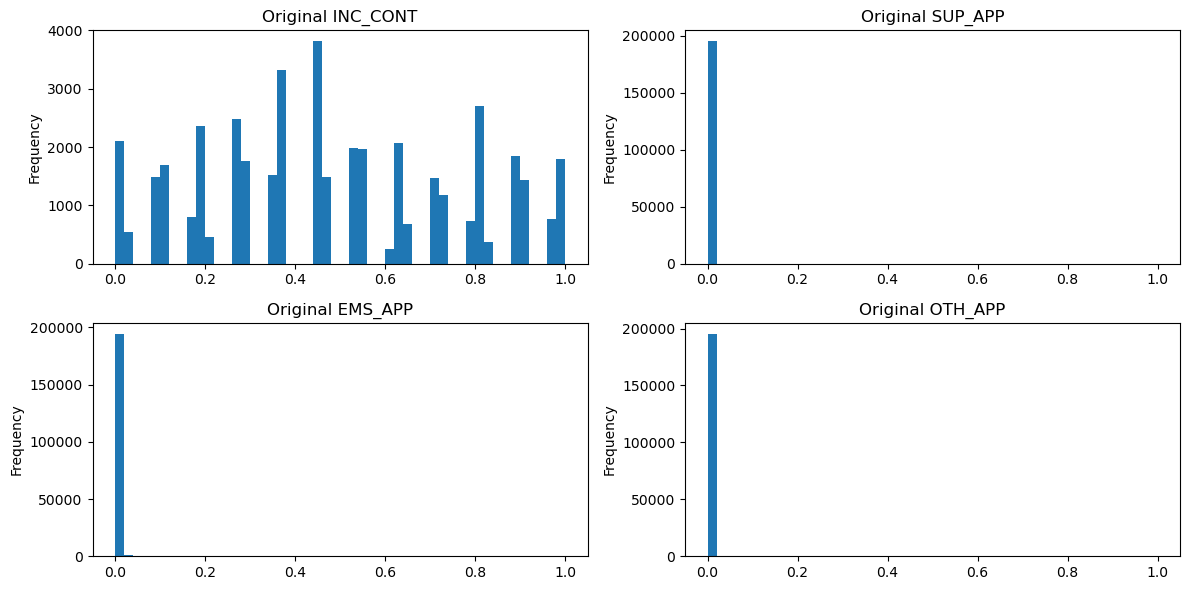

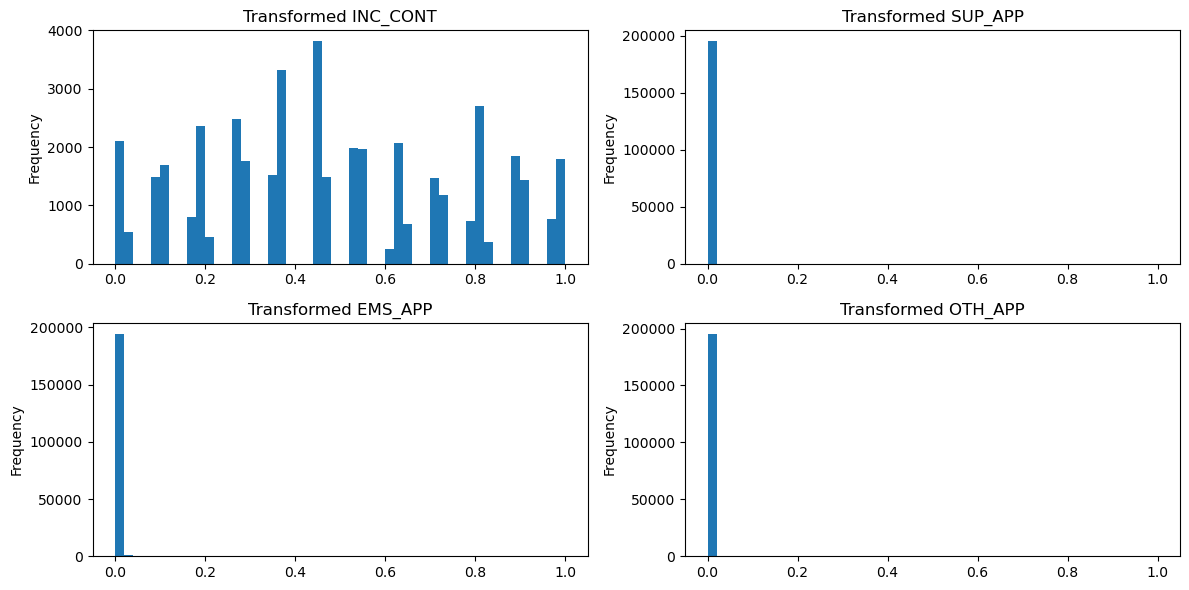

In [6]:
# 过滤出数值类型的数据用于归一化
numeric_cols = df[scaled_columns].select_dtypes(include=[np.number]).columns

# 可视化归一化前的分布
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2, 2, i)
    df[col].plot(kind='hist', bins=50, title=f"Original {col}")
plt.tight_layout()
plt.show()

# 归一化处理
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 可视化归一化后的分布
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2, 2, i)
    df[col].plot(kind='hist', bins=50, title=f"Transformed {col}")
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


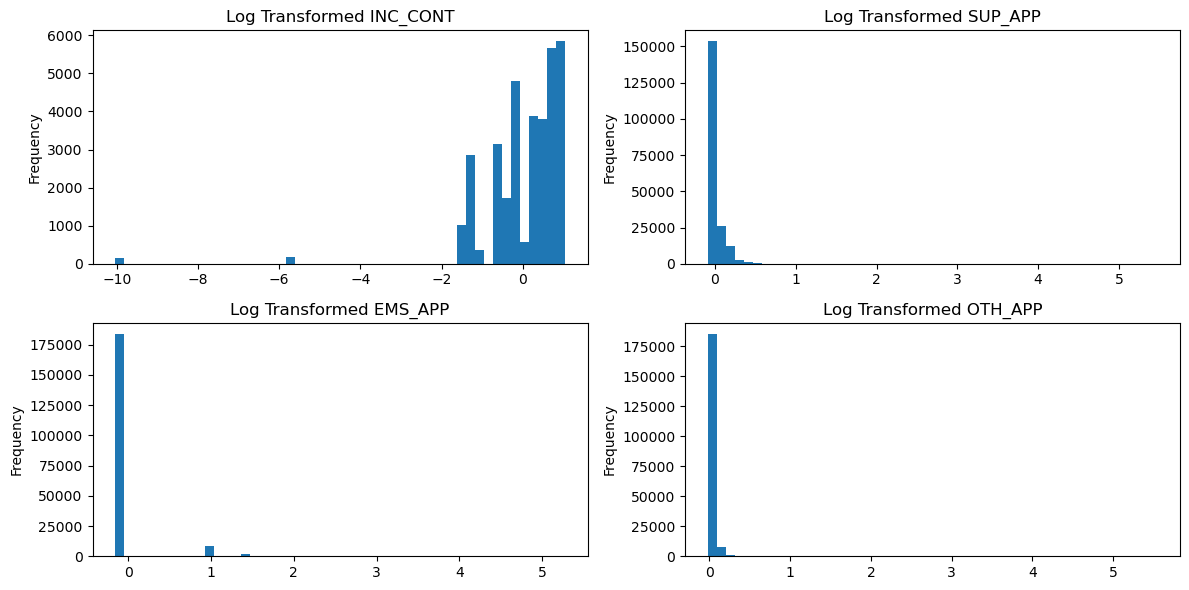

In [8]:
import numpy as np

# Apply log transformation
df_log_transformed = df[numeric_cols].apply(lambda x: np.log1p(x))  # log1p is log(1 + x) to handle zeros

# Visualize the transformed data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2, 2, i)
    df_log_transformed[col].plot(kind='hist', bins=50, title=f"Log Transformed {col}")
plt.tight_layout()
plt.show()


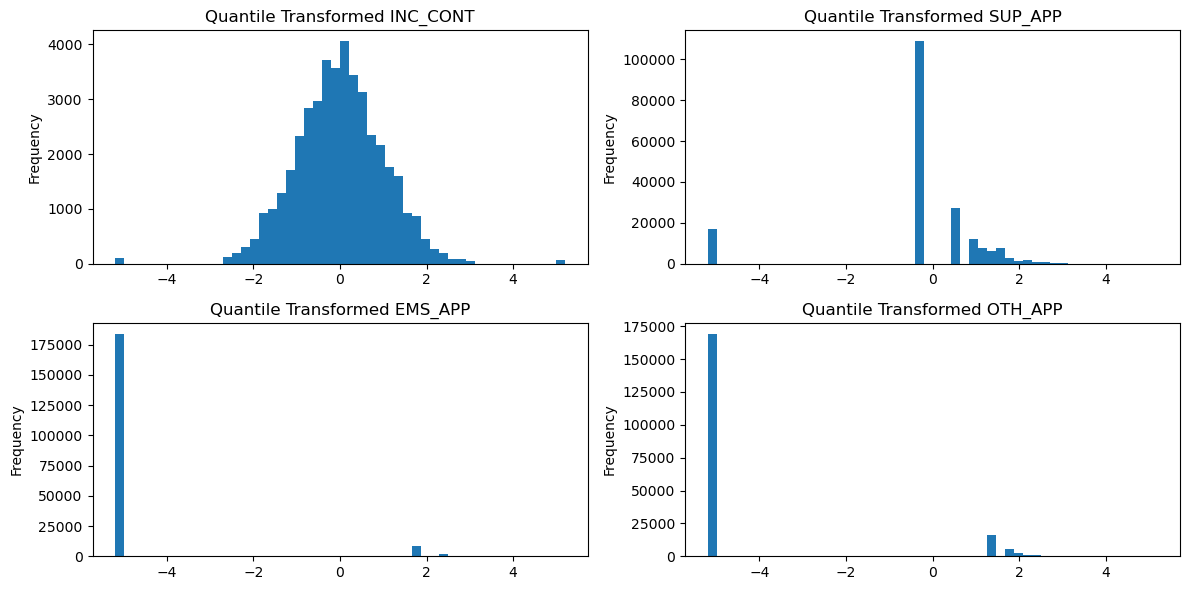

In [13]:
from sklearn.preprocessing import QuantileTransformer

# Apply Quantile Transformation
qt = QuantileTransformer(output_distribution='normal', random_state=0)
df_quantile_transformed = pd.DataFrame(qt.fit_transform(df[numeric_cols[:4]]), columns=numeric_cols[:4])

# Visualize the transformed data
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_quantile_transformed.columns, 1):
    plt.subplot(2, 2, i)
    df_quantile_transformed[col].plot(kind='hist', bins=50, title=f"Quantile Transformed {col}")
plt.tight_layout()
plt.show()


/tmp/ipykernel_31899/3646733894.py:10: DtypeWarning: Columns (7,16,17,19,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                FDID       INC_DATE         INC_NO         EXP_NO  \
count  195277.000000  195277.000000  195277.000000  195277.000000   
mean        0.488883       0.487433       0.067440       0.000077   
std         0.246658       0.296362       0.091238       0.002779   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.314509       0.265957       0.000626       0.000000   
50%         0.538923       0.459220       0.010815       0.000000   
75%         0.660904       0.726950       0.124329       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

            INC_TYPE      INC_CONT       ACT_TAK1      ACT_TAK3  \
count  195277.000000  43110.000000  195276.000000  10435.000000   
mean        0.263646      0.484679       0.441870      0.648924   
std         0.289158      0.283453       0.383473      0.320693   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.058271      0.273050       0.

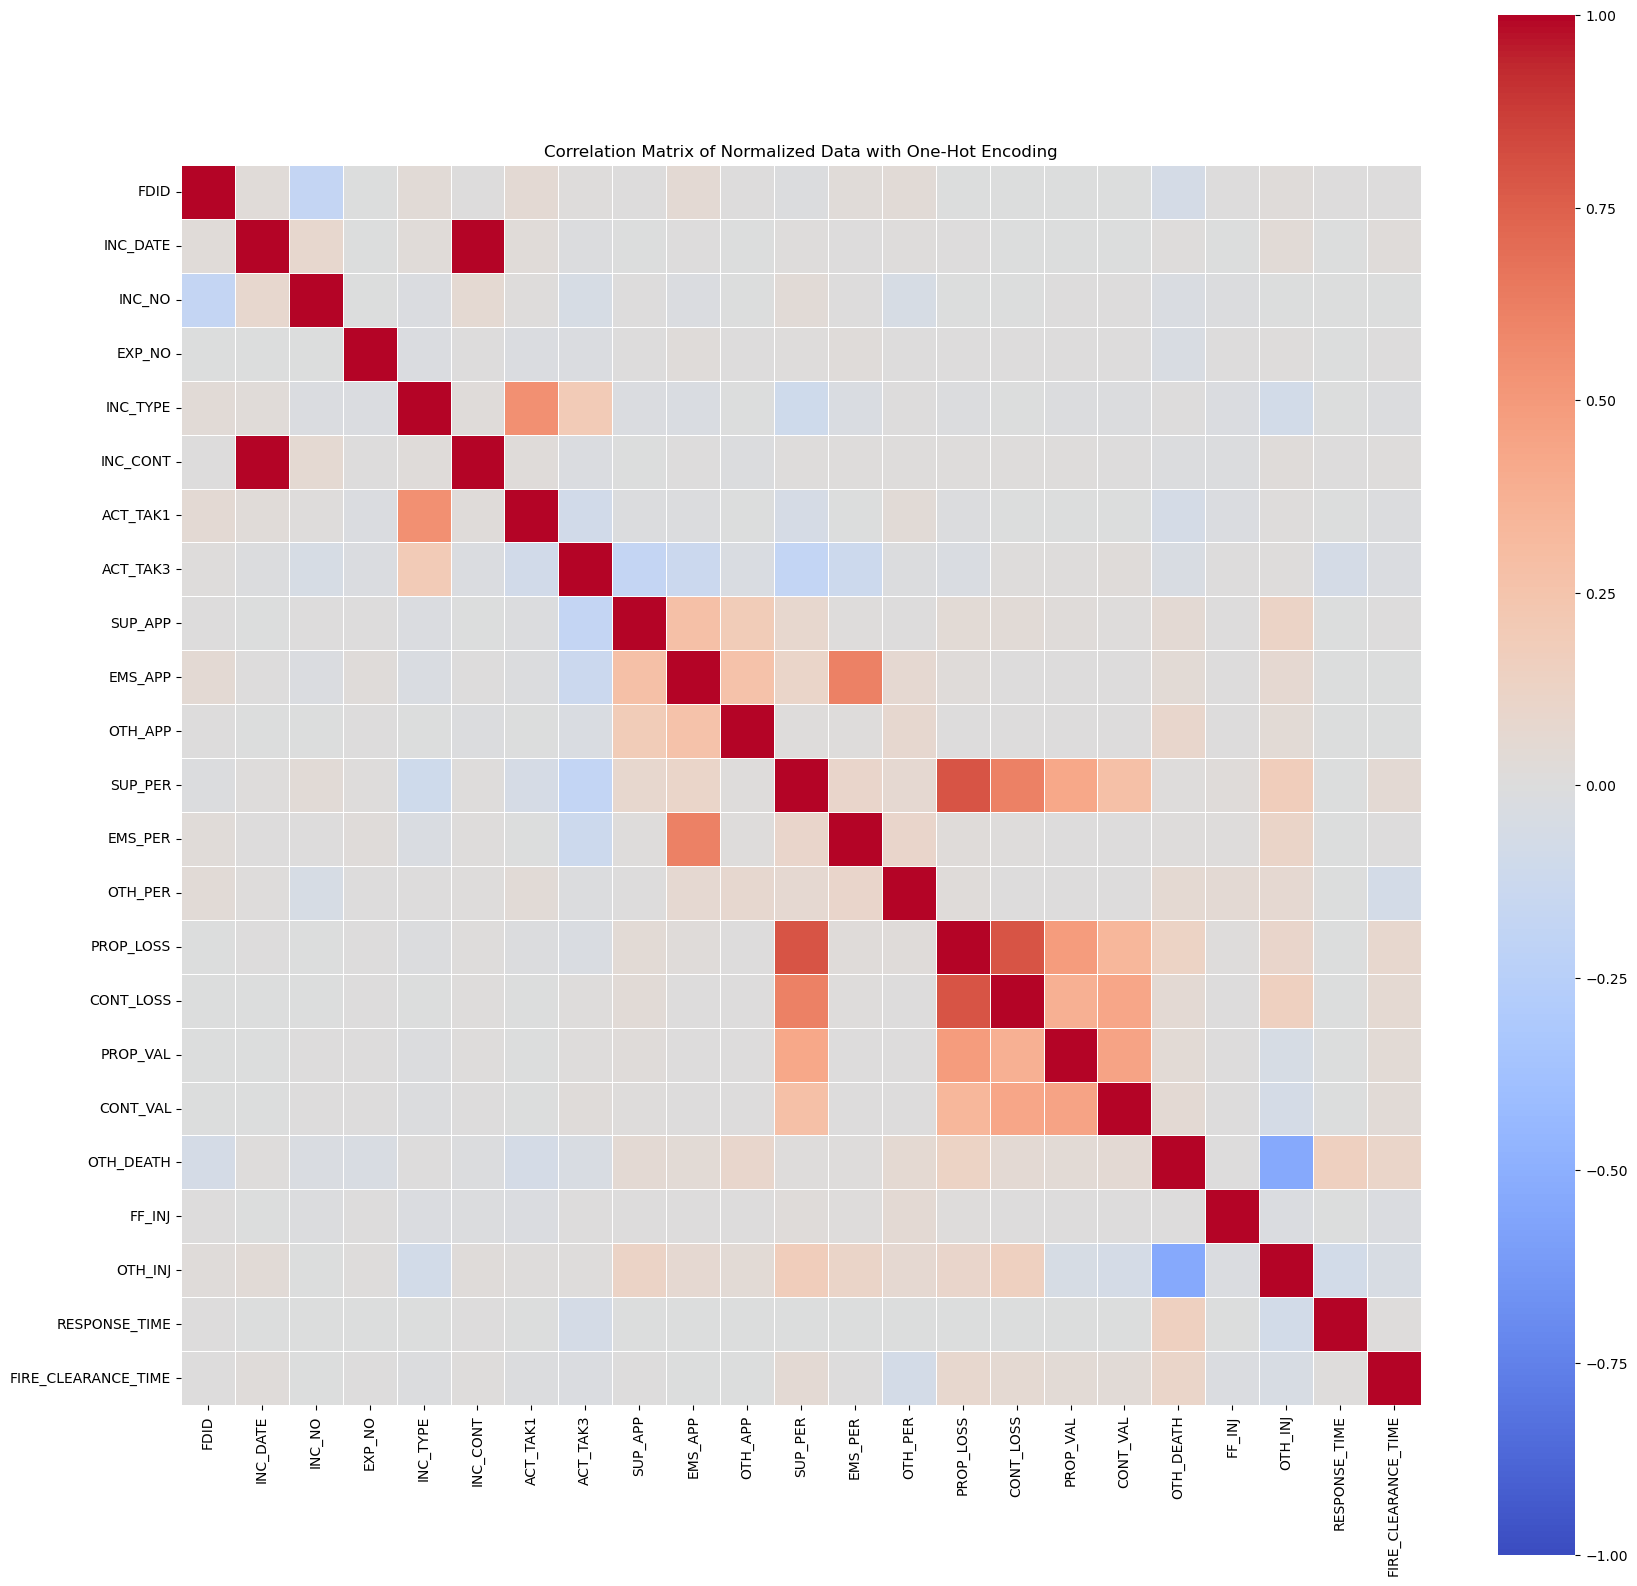

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 读取处理后的数据文件
year = 2021
file_path = f'morans_data/{year}/processed_{year}_onehot_normalized.csv'
df = pd.read_csv(file_path)

# 删除不需要的列
columns_to_remove = ['FF_DEATH', 'VERSION']
df = df.drop(columns=columns_to_remove, errors='ignore')

# 只保留数值列
numeric_df = df.select_dtypes(include=[np.number])

# 确保归一化
scaler = MinMaxScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# 检查归一化结果
print(scaled_numeric_df.describe())

# 生成相关矩阵
correlation_matrix = scaled_numeric_df.corr()

# 设置绘图的尺寸
plt.figure(figsize=(20, 20))

# 绘制热图，调整颜色映射去掉白色部分
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1)

# 设置标题
plt.title('Correlation Matrix of Normalized Data with One-Hot Encoding')

# 显示图像
plt.show()


/tmp/ipykernel_92/927004142.py:12: DtypeWarning: Columns (7,16,17,19,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            FDID   INC_DATE     INC_NO  EXP_NO   INC_TYPE   INC_CONT  \
count  48.000000  48.000000  48.000000    48.0  48.000000  48.000000   
mean    0.494215   0.434875   0.163505     0.0   0.161139   0.434875   
std     0.300045   0.341761   0.333329     0.0   0.237074   0.341761   
min     0.000000   0.000000   0.000000     0.0   0.000000   0.000000   
25%     0.209906   0.178571   0.001081     0.0   0.000000   0.178571   
50%     0.570638   0.364241   0.006283     0.0   0.000000   0.364241   
75%     0.663030   0.739574   0.085314     0.0   0.408163   0.739574   
max     1.000000   1.000000   1.000000     0.0   1.000000   1.000000   

        ACT_TAK1   ACT_TAK3    SUP_APP    EMS_APP  ...    OTH_PER  PROP_LOSS  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000  48.000000   
mean    0.222701   0.422149   0.299479   0.119792  ...   0.061458   0.102877   
std     0.258183   0.399291   0.187703   0.185868  ...   0.163160   0.206149   
min     0.000000   0.000000   0

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

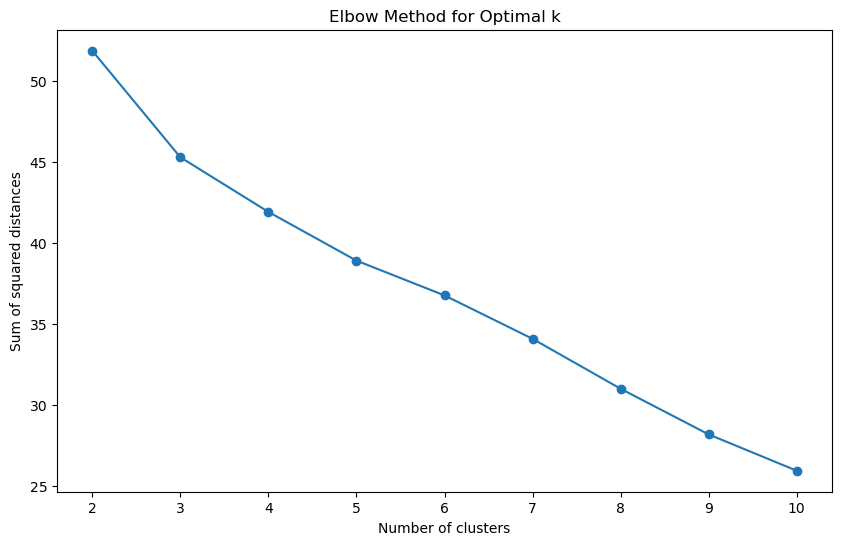

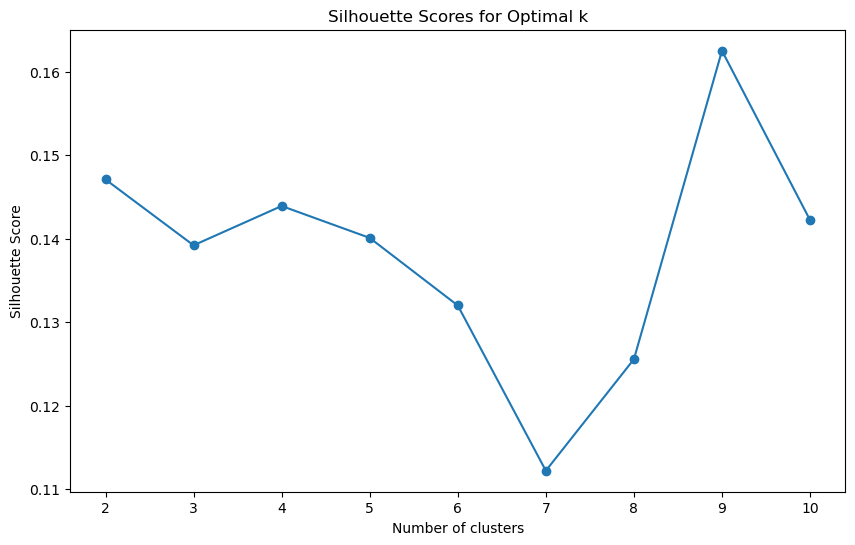

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types

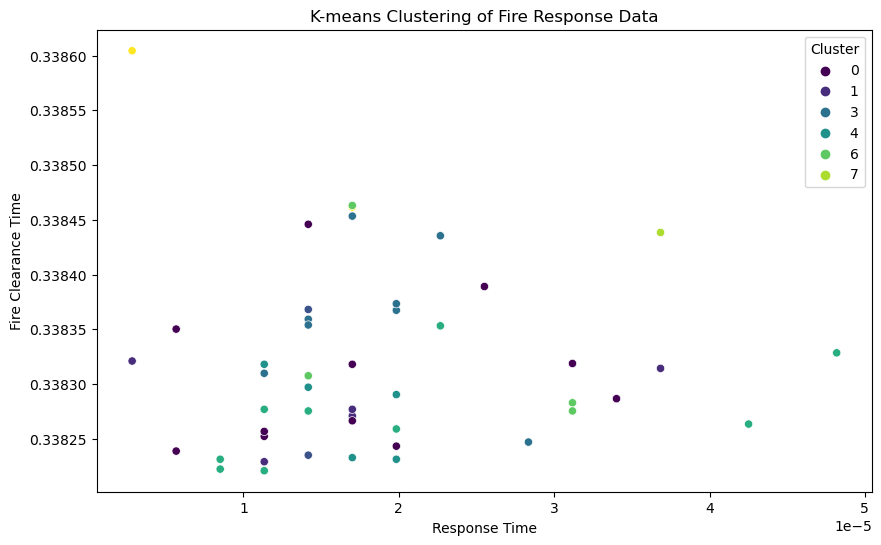

Cluster Centers:
[[ 4.09370817e-01  1.78349601e-01  3.51140793e-03  0.00000000e+00
   1.52133581e-01  1.78349607e-01  1.36886102e-01  9.22248804e-01
   2.78409091e-01  4.54545455e-02  7.07070707e-02  2.54901961e-01
   4.54545455e-02  5.00000000e-02  7.92265455e-02  4.71872727e-02
   5.34984487e-03  1.29262370e-03  9.09090909e-02  4.54545455e-02
   4.09090909e-01  3.23863636e-01  2.22045012e-01]
 [ 4.95457385e-01  4.32653061e-01  2.25159620e-02  0.00000000e+00
   2.28571429e-01  4.32653068e-01  9.56321839e-01  6.05263158e-02
   3.62500000e-01  5.00000000e-02  6.66666667e-02  3.60784314e-01
   6.66666667e-02  3.00000000e-02  1.46666667e-02  1.16000000e-02
   2.01414066e-03  3.70416672e-04  0.00000000e+00 -6.93889390e-18
   5.00000000e-01  3.12500000e-01  1.60623782e-01]
 [ 2.65060241e-02  9.85359361e-01  7.38978180e-01  0.00000000e+00
   2.95918367e-01  9.85359360e-01  2.52873563e-01  6.57894737e-03
   2.50000000e-01  3.75000000e-01  5.55555556e-02  2.35294118e-01
   5.83333333e-01  2.50

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# 读取处理后的数据文件
year = 2021
file_path = f'morans_data/{year}/processed_{year}_onehot_normalized.csv'
df = pd.read_csv(file_path)

# 删除不需要的列
columns_to_remove = ['FF_DEATH', 'VERSION']
df = df.drop(columns=columns_to_remove, errors='ignore')

# 只保留数值列
numeric_df = df.select_dtypes(include=[np.number])

# 删除含有缺失值的样本
numeric_df = numeric_df.dropna()

# 确保归一化
scaler = MinMaxScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# 检查归一化结果
print(scaled_numeric_df.describe())

# 使用肘部法则确定最佳k值
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_numeric_df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_numeric_df, kmeans.labels_))

# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# 绘制轮廓系数图
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 选择最佳k值进行K-means聚类
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(scaled_numeric_df)

# 将聚类结果添加到数据框
df = df.loc[numeric_df.index]  # 确保df与numeric_df的索引对齐
df['Cluster'] = kmeans.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RESPONSE_TIME', y='FIRE_CLEARANCE_TIME', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Fire Response Data')
plt.xlabel('Response Time')
plt.ylabel('Fire Clearance Time')
plt.legend(title='Cluster')
plt.show()

# 打印每个聚类的中心
print("Cluster Centers:")
print(kmeans.cluster_centers_)


/tmp/ipykernel_55054/3855175366.py:12: DtypeWarning: Columns (7,16,17,19,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


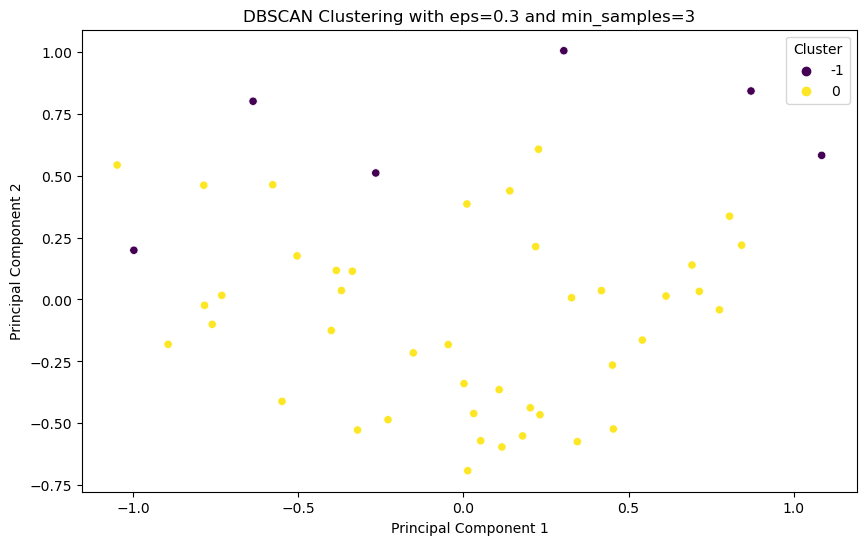

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


eps=0.3, min_samples=3
Cluster
 0    42
-1     6
Name: count, dtype: int64



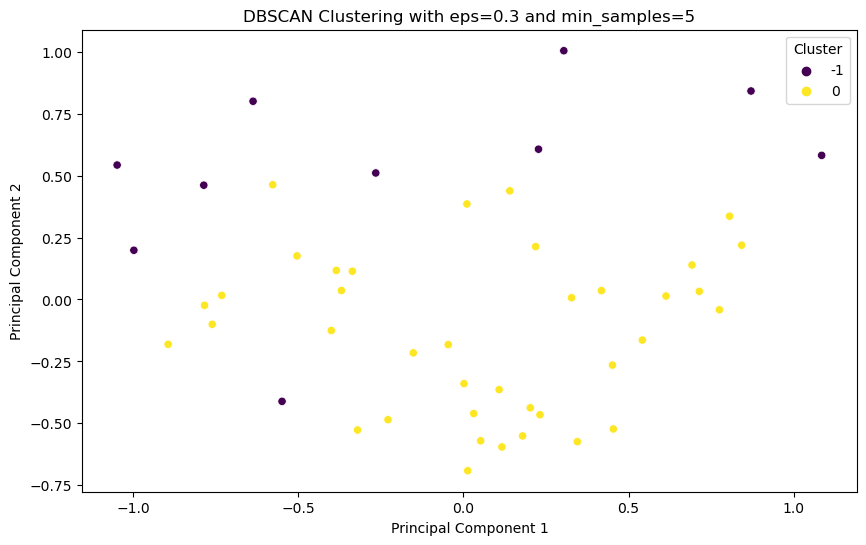

eps=0.3, min_samples=5
Cluster
 0    38
-1    10
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


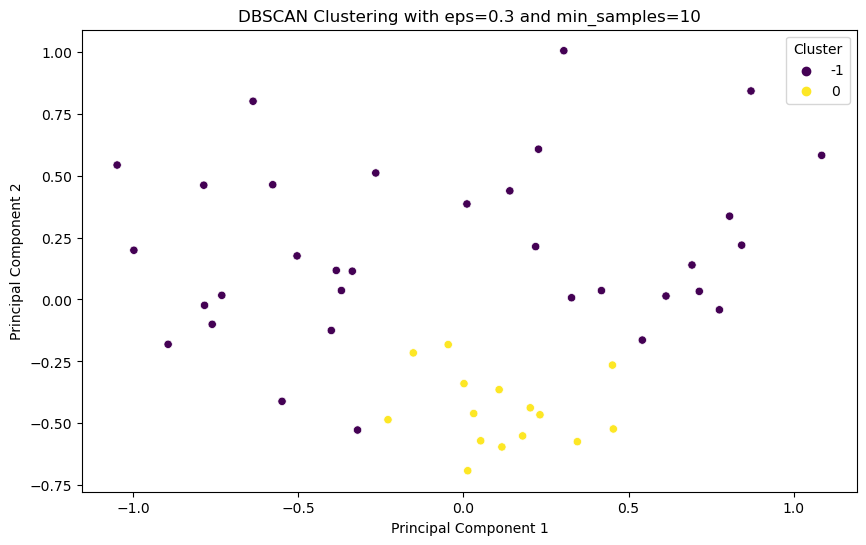

eps=0.3, min_samples=10
Cluster
-1    33
 0    15
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

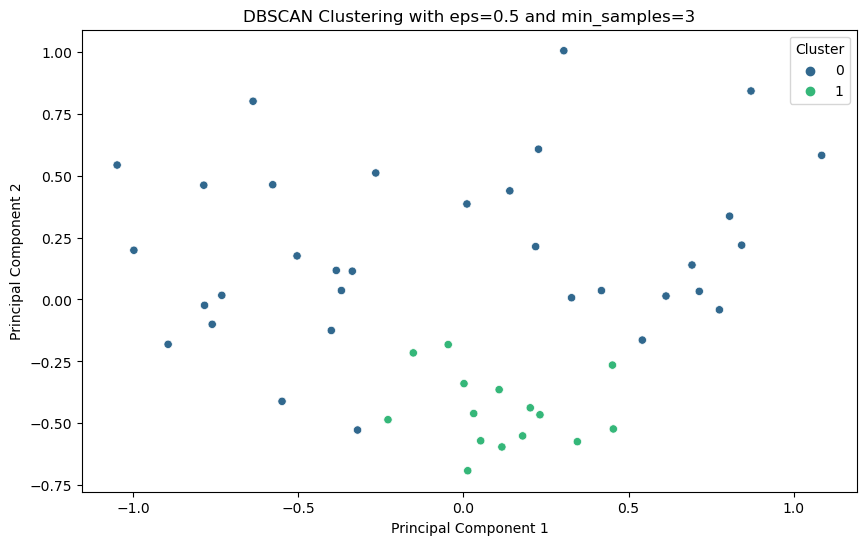

eps=0.5, min_samples=3
Cluster
0    33
1    15
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


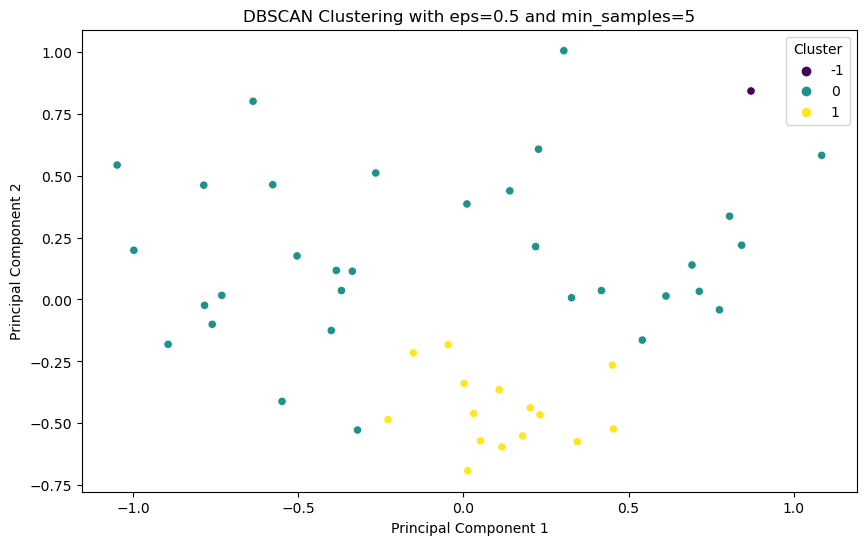

eps=0.5, min_samples=5
Cluster
 0    32
 1    15
-1     1
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


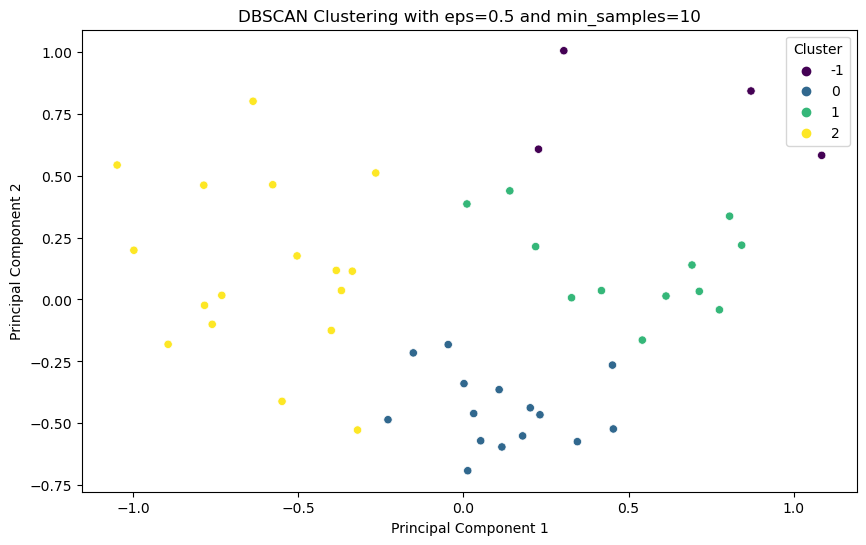

eps=0.5, min_samples=10
Cluster
 2    17
 0    15
 1    12
-1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


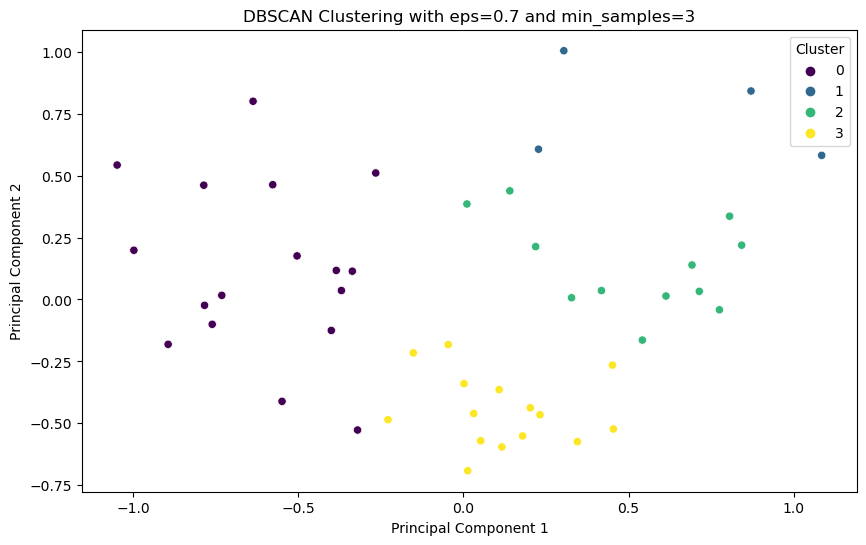

eps=0.7, min_samples=3
Cluster
0    17
3    15
2    12
1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


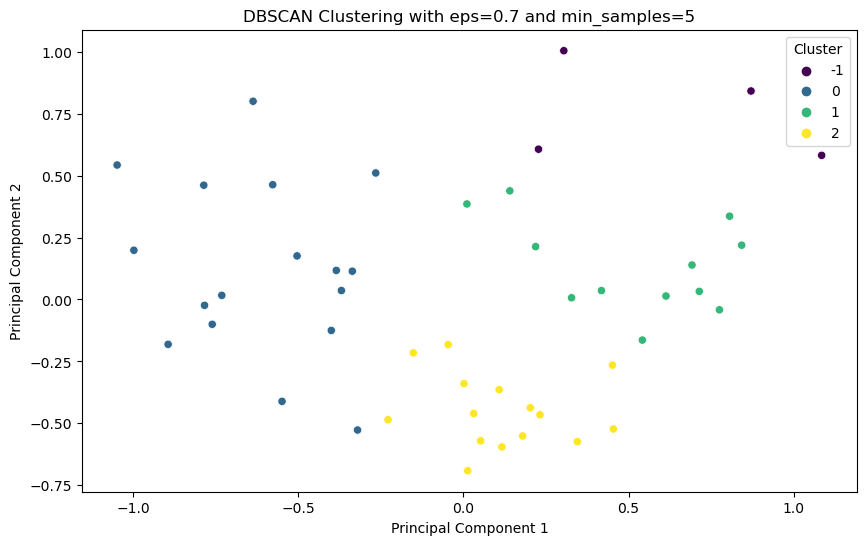

eps=0.7, min_samples=5
Cluster
 0    17
 2    15
 1    12
-1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


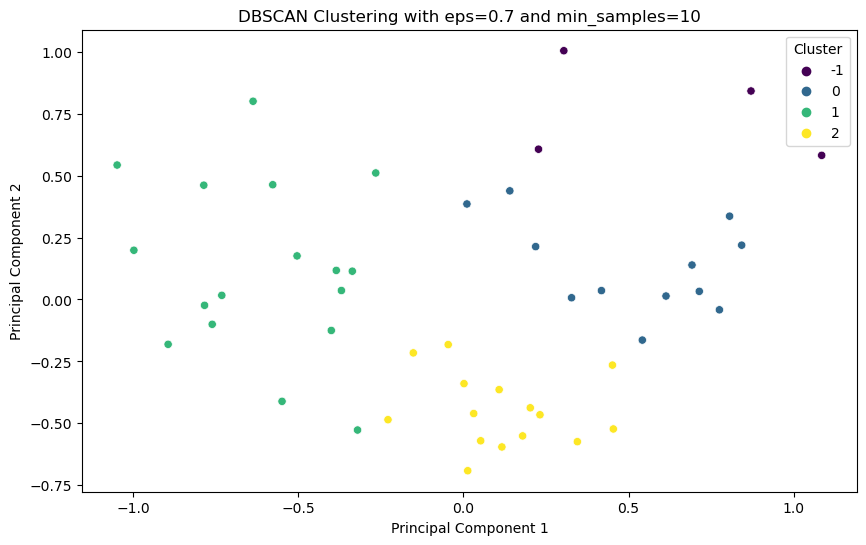

eps=0.7, min_samples=10
Cluster
 1    17
 2    15
 0    12
-1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


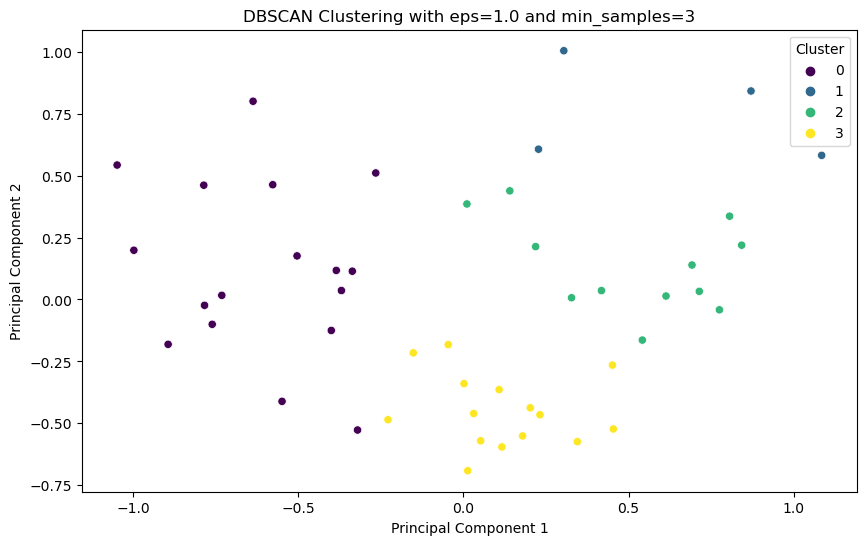

eps=1.0, min_samples=3
Cluster
0    17
3    15
2    12
1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


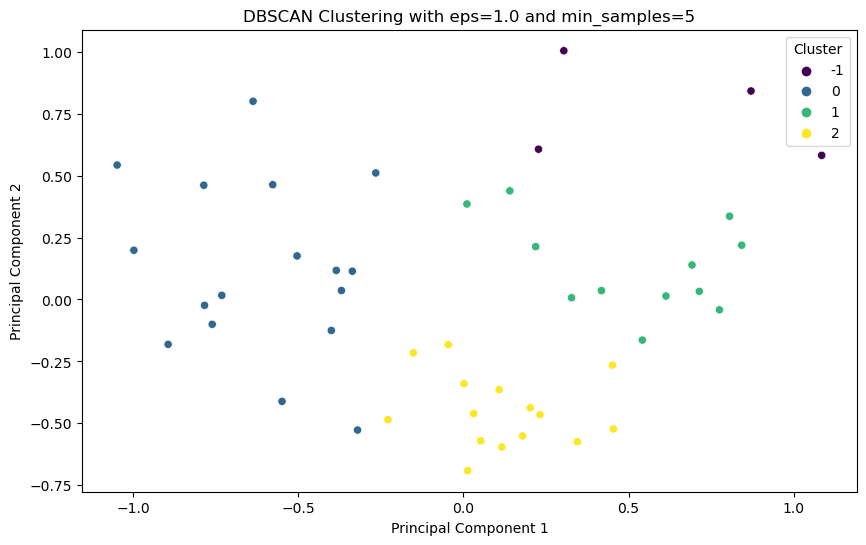

eps=1.0, min_samples=5
Cluster
 0    17
 2    15
 1    12
-1     4
Name: count, dtype: int64



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


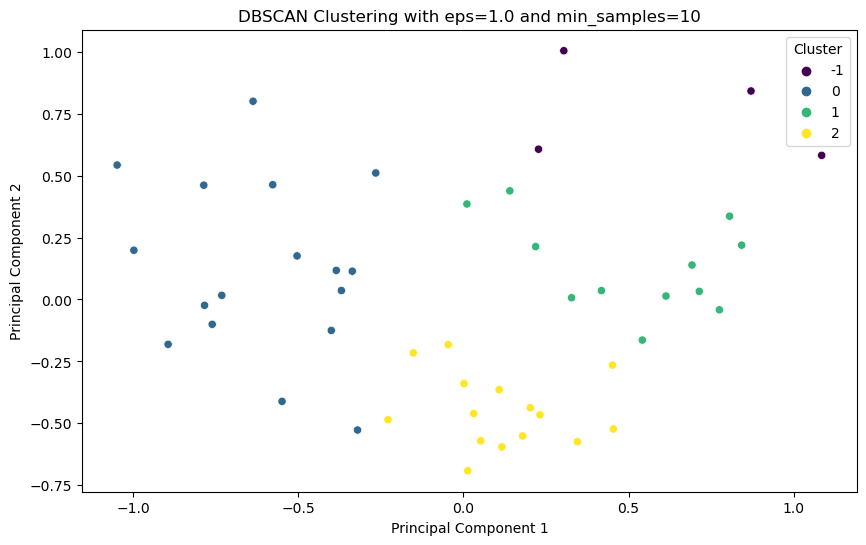

eps=1.0, min_samples=10
Cluster
 0    17
 2    15
 1    12
-1     4
Name: count, dtype: int64



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 读取处理后的数据文件
year = 2021
file_path = f'morans_data/{year}/processed_{year}_onehot_normalized.csv'
df = pd.read_csv(file_path)

# 删除不需要的列
columns_to_remove = ['FF_DEATH', 'VERSION']
df = df.drop(columns=columns_to_remove, errors='ignore')

# 只保留数值列
numeric_df = df.select_dtypes(include=[np.number])

# 删除含有缺失值的样本
numeric_df = numeric_df.dropna()

# 确保归一化
scaler = MinMaxScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# 使用PCA进行降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_numeric_df)
pca_df = pd.DataFrame(data=pca_result, columns=['principal_component_1', 'principal_component_2'])

# 调整DBSCAN参数
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

# 尝试不同参数组合
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(pca_df)
        pca_df['Cluster'] = dbscan.labels_
        
        # 可视化聚类结果
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='Cluster', palette='viridis')
        plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Cluster')
        plt.show()
        
        # 输出聚类标签的统计信息
        cluster_counts = pca_df['Cluster'].value_counts()
        print(f'eps={eps}, min_samples={min_samples}')
        print(cluster_counts)
        print()


Year 2021 - Root Mean Squared Error: 23.25803707258202


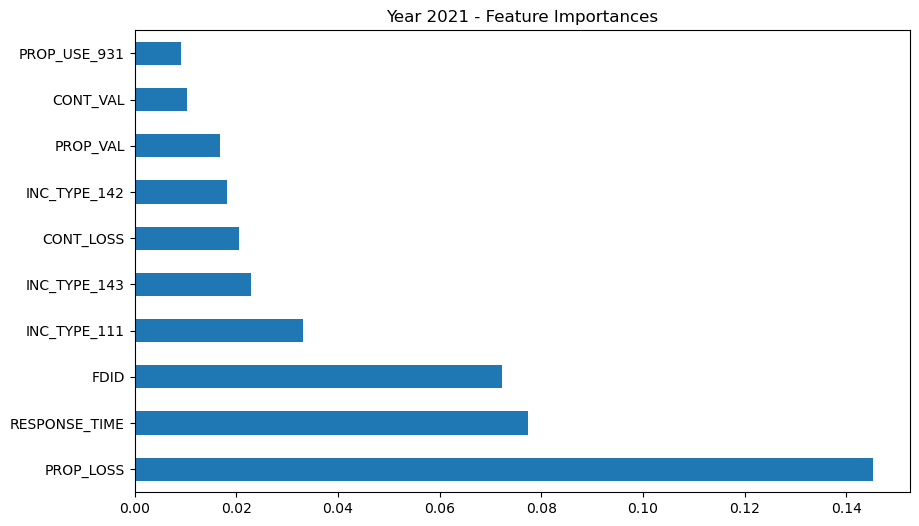

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


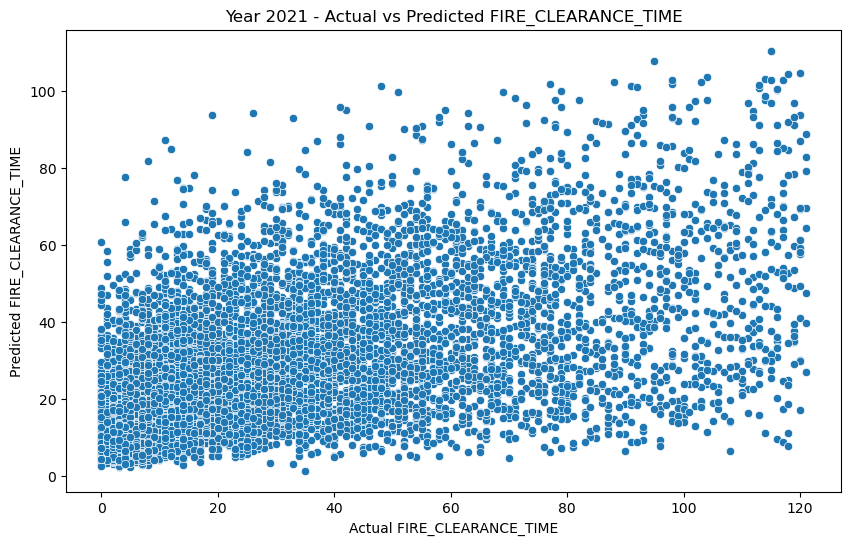

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 识别和去除异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 处理特征工程和模型训练
def process_and_train_model(year):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    data = pd.read_csv(file_path)
    
    # 去除FIRE_CLEARANCE_TIME的异常值
    data_clean = remove_outliers(data, 'FIRE_CLEARANCE_TIME')
    
    # one-hot编码
    data_clean = pd.get_dummies(data_clean, columns=['INC_TYPE', 'DISTRICT', 'PROP_USE', 'MONTH', 'HOUR'])
    
    # 特征和目标变量
    features = [col for col in data_clean.columns if col != 'FIRE_CLEARANCE_TIME']
    X = data_clean[features]
    y = data_clean['FIRE_CLEARANCE_TIME']
    
    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 训练模型
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 评估模型
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f'Year {year} - Root Mean Squared Error: {rmse}')
    
    # 查看特征重要性
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Year {year} - Feature Importances')
    plt.show()
    
    # 评估模型的性能
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual FIRE_CLEARANCE_TIME')
    plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
    plt.title(f'Year {year} - Actual vs Predicted FIRE_CLEARANCE_TIME')
    plt.show()

# 处理和训练模型
for year in range(2021, 2022):
    process_and_train_model(year)


In [1]:
import pandas as pd
import numpy as np
import os

# 识别和去除异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def process_data(year):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    temp_file_path = f'morans_data/{year}/temp_processed_chunks/'
    
    # 确保临时目录存在
    os.makedirs(temp_file_path, exist_ok=True)
    
    chunk_size = 10000
    chunk_index = 0
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # 去除FIRE_CLEARANCE_TIME的异常值
        chunk = remove_outliers(chunk, 'FIRE_CLEARANCE_TIME')
        
        # one-hot编码
        chunk = pd.get_dummies(chunk, columns=['INC_TYPE', 'DISTRICT', 'PROP_USE', 'MONTH', 'HOUR'])
        
        # 删除缺失值
        chunk.dropna(inplace=True)
        
        # 增加特征交互项
        chunk['PROP_LOSS_RESPONSE_TIME'] = chunk['PROP_LOSS'] * chunk['RESPONSE_TIME']
        chunk['PROP_VAL_RESPONSE_TIME'] = chunk['PROP_VAL'] * chunk['RESPONSE_TIME']
        
        # 保存处理后的数据块
        chunk.to_csv(f'{temp_file_path}chunk_{chunk_index}.csv', index=False)
        chunk_index += 1
    
    print(f"Processed data chunks saved to {temp_file_path} for year {year}")

def combine_processed_chunks(year):
    temp_file_path = f'morans_data/{year}/temp_processed_chunks/'
    combined_file_path = f'morans_data/{year}/basicincident_processed_final_{year}.csv'
    
    # 读取所有的临时数据块并合并
    chunks = []
    for file_name in os.listdir(temp_file_path):
        chunk = pd.read_csv(os.path.join(temp_file_path, file_name))
        chunks.append(chunk)
    
    data_clean = pd.concat(chunks, ignore_index=True)
    data_clean.to_csv(combined_file_path, index=False)
    print(f"Combined processed data saved to {combined_file_path} for year {year}")

# 处理数据并合并
for year in range(2020, 2022):
    process_data(year)
    combine_processed_chunks(year)


Processed data chunks saved to morans_data/2020/temp_processed_chunks/ for year 2020
Combined processed data saved to morans_data/2020/basicincident_processed_final_2020.csv for year 2020
Processed data chunks saved to morans_data/2021/temp_processed_chunks/ for year 2021
Combined processed data saved to morans_data/2021/basicincident_processed_final_2021.csv for year 2021


/tmp/ipykernel_198/85507723.py:13: DtypeWarning: Columns (43,44,48,60,64,71,74,75,76,77,78,79,81,82,83,84,86,87,88,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,124,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,164,165,167,168,169,170,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,218,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,276,277,278,279,280,281,282,283,284,285,286,288,290,291,292,293,294,295,296,297,298,299,300,301,302,304,305,306,307,308,309,310,311,312,313,314,316,317,318,320,321,322,323,325,326,327,328,329,330,331,332,333,334,335,336,337,339,34

Processing chunk 1


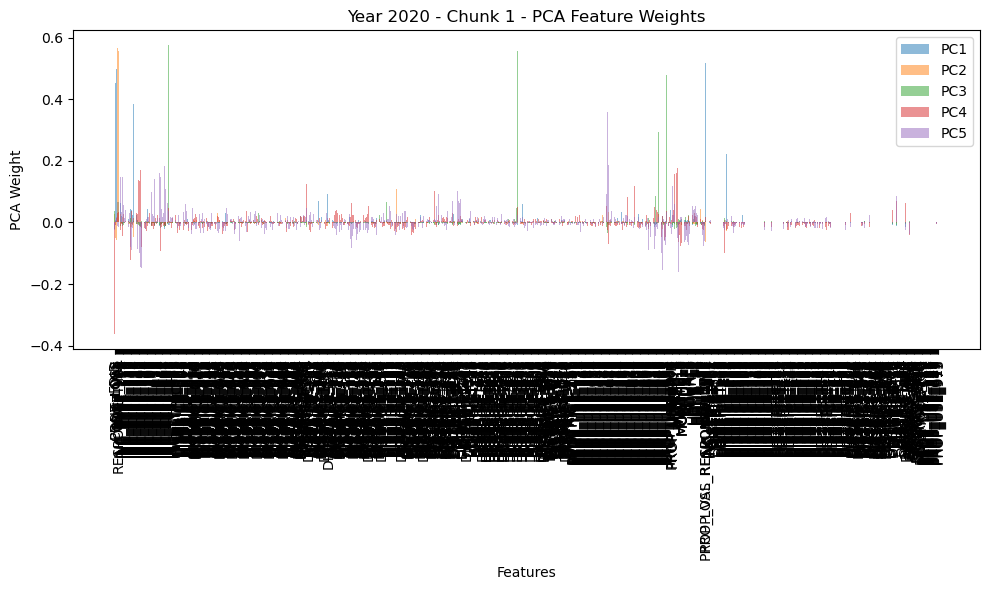

Explained variance by each principal component for chunk 1: [0.00415093 0.00390372 0.00336371 0.00312295 0.00287184]


/tmp/ipykernel_198/85507723.py:13: DtypeWarning: Columns (43,44,48,60,64,72,73,80,85,94,95,96,98,106,108,109,122,123,124,125,136,137,151,153,154,167,179,195,197,198,222,239,241,258,259,260,261,267,274,276,303,304,313,315,338,351,366,376,382,388,390,397,399,400,401,402,408,410,413,414,415,417,418,423,431,473,523,534,540,544,548,550,554,555,562,569,581,595,624,626,669,679,682,685,686,687,688,689,691,692,694,695,696,698,699,700,706,708,712,713,714,716,717,718,722,724,725,729,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,749,750,751,752,753,754,756,758,759,760,761,762,763,764,766,767,768,769,771,772,773,774,775,776,777,779,781,782,783,784,785,786,787,788,789,790,791,792,796,797,798,799,801,802,803,805,806,823,824,825,826,828,829,830,832,833,834,835,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,879,880,881,882,884,886,887,889,893,894,898,899,900,901,902,903,904

Processing chunk 2


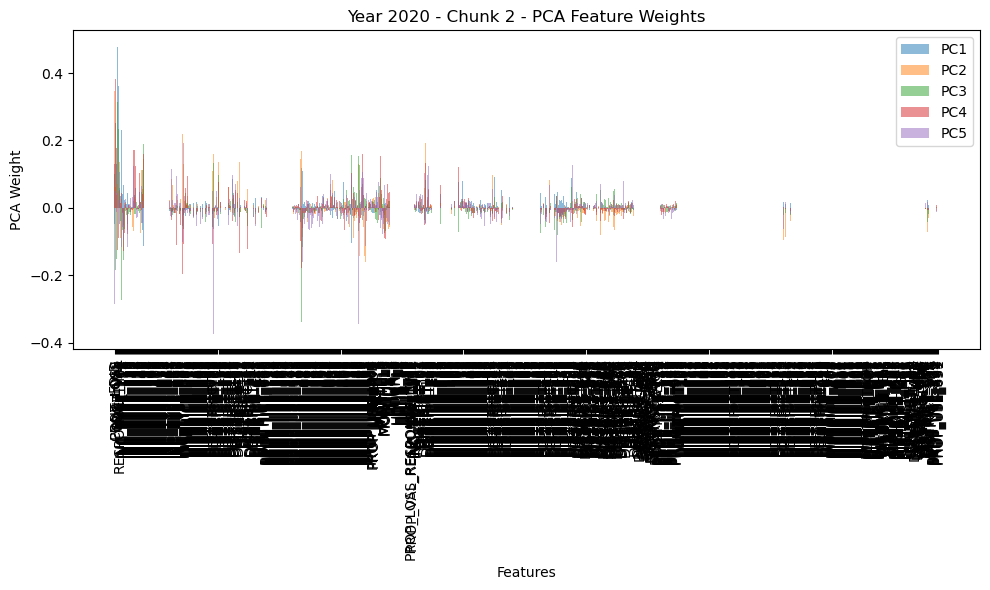

Explained variance by each principal component for chunk 2: [0.0056988  0.00501925 0.00483508 0.0044152  0.00409315]


/tmp/ipykernel_198/85507723.py:13: DtypeWarning: Columns (96,98,108,109,124,125,137,153,154,163,166,167,197,198,221,240,241,259,260,261,267,275,276,289,304,313,315,319,327,328,351,366,376,388,389,390,391,395,396,397,399,402,403,411,413,414,417,418,419,423,429,476,478,521,523,525,531,539,540,541,544,548,550,577,581,614,626,669,671,673,684,685,687,688,689,690,693,697,698,702,703,704,705,707,709,712,713,714,723,724,726,727,730,733,735,737,742,744,746,753,754,755,757,762,765,770,778,780,793,794,795,800,807,808,809,810,812,813,814,815,816,817,818,819,820,821,822,831,836,854,868,885,888,890,891,893,917,918,920,921,923,924,927,934,935,937,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,980,981,985,986,987,992,993,994,996,997,999,1001,1002,1003,1004,1005,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1030,1031,1032,1033,1034,1035,103

Processing chunk 3


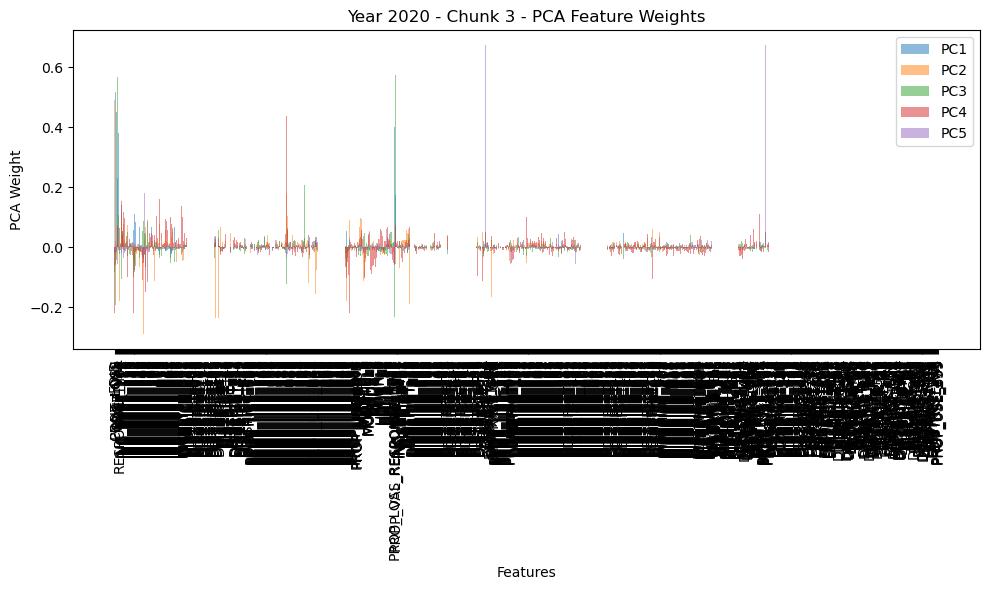

Explained variance by each principal component for chunk 3: [0.00468748 0.00403234 0.00337828 0.00333204 0.00331774]


/tmp/ipykernel_198/85507723.py:13: DtypeWarning: Columns (240,241,259,261,262,275,276,289,313,327,328,376,400,401,402,403,404,405,406,408,409,410,414,476,478,521,524,527,539,544,554,577,582,595,671,677,688,689,698,710,711,712,713,714,716,724,728,731,733,737,742,744,746,749,751,752,753,754,765,769,772,774,821,822,823,824,830,835,847,851,852,853,868,887,892,893,896,904,906,908,914,917,918,920,924,926,930,931,933,936,940,941,946,947,949,953,956,962,964,966,967,978,979,982,983,984,989,990,991,992,995,996,998,999,1000,1006,1007,1009,1013,1025,1031,1032,1036,1038,1042,1048,1049,1051,1073,1098,1119,1136,1141,1151,1158,1190,1191,1192,1193,1194,1196,1197,1198,1200,1201,1202,1204,1205,1207,1208,1209,1210,1211,1212,1214,1215,1216,1217,1218,1219,1220,1221,1222,1224,1225,1226,1227,1229,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1252,1253,1259,1260,1261,1262,1269,1270,1271,1272,1273,1274,1275,1286,1287,1288,1291,1292,1293,1294,1295,1296,1297,1298,1300,1

Processing chunk 4


KeyboardInterrupt: 

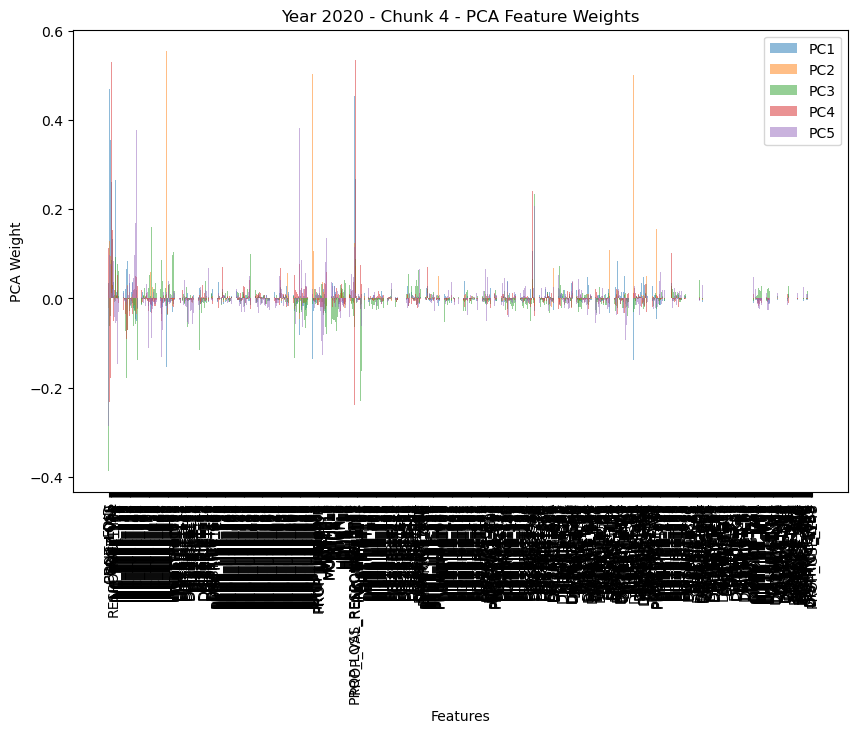

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

def pca_feature_analysis(year, chunk_size=10000, n_components=5):
    file_path = f'morans_data/{year}/basicincident_processed_final_{year}.csv'
    
    # 分块读取数据
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    
    for chunk_index, chunk in enumerate(chunks):
        print(f'Processing chunk {chunk_index + 1}')
        
        # 移除全为空的列
        chunk.dropna(axis=1, how='all', inplace=True)
        
        # 特征和目标变量
        features = [col for col in chunk.columns if col != 'FIRE_CLEARANCE_TIME']
        X = chunk[features]
        
        # 处理缺失值
        imputer = SimpleImputer(strategy='mean')  # 可以选择 'mean', 'median', 或 'most_frequent'
        X_imputed = imputer.fit_transform(X)
        
        # 数据标准化
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_imputed)
        
        # PCA分析
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)
        
        # 获取各主成分的权重
        pca_components = pca.components_
        
        # 可视化PCA权重
        plt.figure(figsize=(10, 6))
        for i in range(n_components):
            plt.bar(range(len(features)), pca_components[i], alpha=0.5, align='center', label=f'PC{i+1}')
        
        plt.xticks(range(len(features)), features, rotation=90)
        plt.xlabel('Features')
        plt.ylabel('PCA Weight')
        plt.title(f'Year {year} - Chunk {chunk_index + 1} - PCA Feature Weights')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
        
        # 输出解释的方差比例
        explained_variance = pca.explained_variance_ratio_
        print(f'Explained variance by each principal component for chunk {chunk_index + 1}: {explained_variance}')

# 运行PCA分析
for year in range(2020, 2022):
    pca_feature_analysis(year)


/tmp/ipykernel_61391/3035932183.py:20: DtypeWarning: Columns (25,70,71,72,73,74,75,76,82,84,85,86,87,93,94,95,97,98,100,101,102,104,105,106,107,108,109,110,112,113,114,115,116,117,118,119,121,122,124,125,126,127,128,129,130,132,133,135,136,137,138,139,140,141,143,145,146,147,148,149,150,151,152,153,154,155,156,157,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,205,206,208,209,210,211,212,213,214,215,216,217,219,220,222,223,224,225,226,227,229,231,232,233,234,235,236,237,239,240,242,243,244,245,246,248,249,250,252,253,254,255,256,257,258,259,261,262,263,264,265,266,267,269,270,271,272,273,274,276,277,279,280,281,282,285,286,287,288,289,290,291,292,294,295,297,298,299,301,302,303,304,305,306,307,308,309,310,311,314,315,316,317,318,320,321,322,323,324,325,326,329,330,331,332,334,337,339,340,341,342,343,344,345,347,348,349,350,351,352,353,356,357,358,359,360,361,362,364,365,366,

Processing chunk 1


/tmp/ipykernel_61391/3035932183.py:20: DtypeWarning: Columns (25,78,79,80,81,83,89,90,91,92,99,103,123,134,142,144,158,159,169,198,199,201,206,209,210,211,223,224,225,230,231,233,234,242,250,253,262,263,269,270,277,278,279,280,281,284,285,286,288,289,294,298,303,305,306,312,313,314,315,319,323,324,325,327,328,330,335,339,340,341,342,343,344,345,346,347,348,349,350,351,352,354,356,357,360,363,364,365,367,369,374,376,380,383,387,393,394,397,399,401,402,409,410,412,416,419,421,428,432,441,442,451,459,461,468,469,471,472,475,476,479,480,482,483,484,485,486,490,491,492,493,495,496,499,500,503,507,509,512,517,526,538,582,592,599,614,622,640,641,652,654,660,663,667,676,678,680,704,712,717,752,807,814,815,816,817,818,819,820,821,822,823,824,826,829,830,832,836,838,839,840,841,843,844,845,846,847,851,852,853,855,856,858,859,861,862,863,864,865,867,868,869,871,872,873,874,875,876,885,887,888,889,890,891,892,894,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,919,920,921,924,9

Processing chunk 2


/tmp/ipykernel_61391/3035932183.py:20: DtypeWarning: Columns (23,25,66,70,71,72,124,187,189,198,199,201,206,209,210,211,221,223,224,225,231,233,234,242,253,260,262,263,269,270,277,279,280,283,286,288,289,294,298,305,314,315,323,324,325,330,336,338,339,340,341,342,344,345,348,349,350,351,355,356,360,364,365,369,372,373,374,377,380,381,383,392,394,402,413,456,466,474,477,478,487,491,515,520,547,562,569,575,577,578,589,592,595,596,597,599,605,616,620,649,652,654,656,660,663,665,666,669,670,676,678,679,680,685,688,689,696,717,718,720,721,723,727,740,752,761,764,833,834,837,842,848,849,850,854,860,866,870,877,878,879,880,881,882,883,884,886,893,895,897,898,899,900,922,932,938,941,942,951,952,980,982,983,984,986,994,998,1018,1019,1020,1024,1051,1052,1053,1054,1080,1082,1092,1093,1099,1101,1103,1104,1105,1106,1107,1108,1109,1110,1114,1121,1122,1123,1126,1127,1128,1130,1131,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1

Processing chunk 3
Processing chunk 4


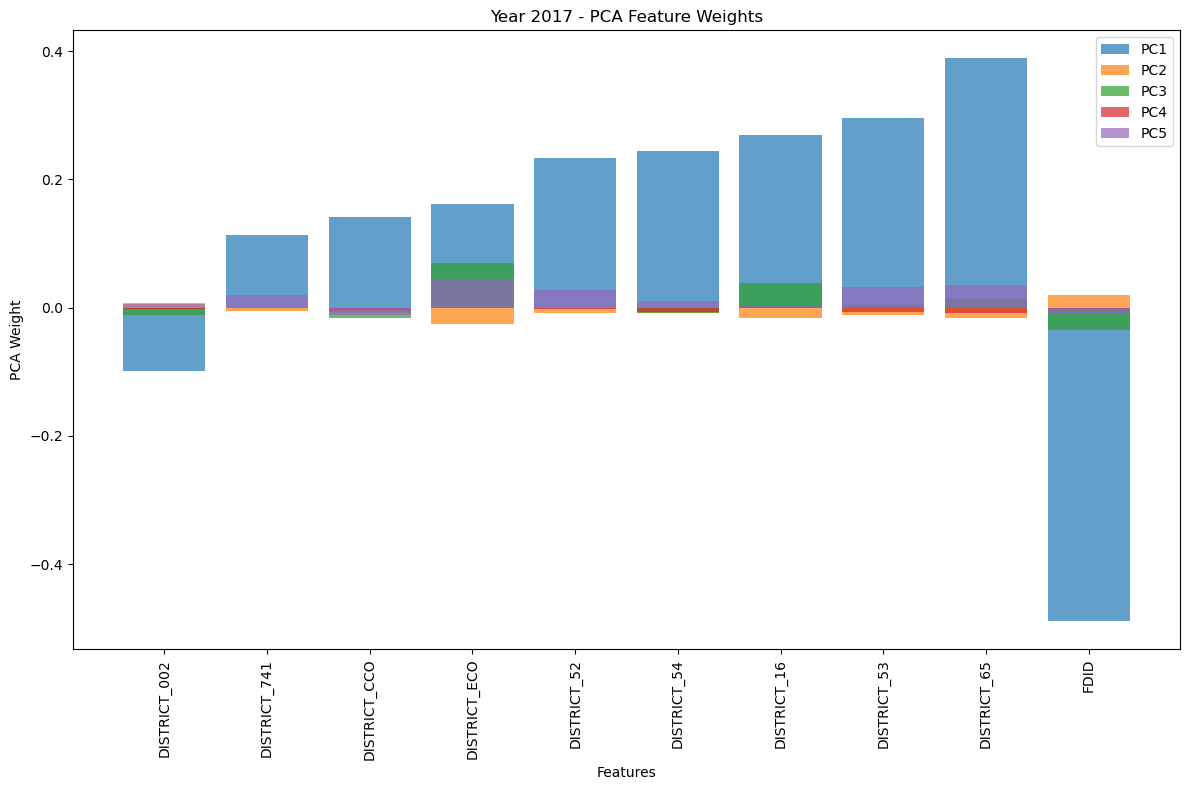

Explained variance by each principal component for the year 2017: [0.00273308 0.00229963 0.00187997 0.00183694 0.00164415]


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def pca_feature_analysis(year, chunk_size=10000, n_components=5):
    file_path = f'morans_data/{year}/basicincident_processed_final_{year}.csv'
    
    # Initialize list to accumulate chunks
    all_data = []
    
    # Initialize a reference to the first chunk's columns
    ref_columns = None

    # Read and process data in chunks
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    
    for chunk_index, chunk in enumerate(chunks):
        print(f'Processing chunk {chunk_index + 1}')
        
        # Remove columns that are entirely NaN
        chunk.dropna(axis=1, how='all', inplace=True)
        
        # Select features and remove the target column
        features = [col for col in chunk.columns if col != 'FIRE_CLEARANCE_TIME']
        X = chunk[features]
        
        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)
        
        # If this is the first chunk, save its columns as the reference
        if ref_columns is None:
            ref_columns = features
        else:
            # Re-align columns with the reference set, adding missing columns with zero values
            aligned_df = pd.DataFrame(X_imputed, columns=features)
            aligned_df = aligned_df.reindex(columns=ref_columns, fill_value=0)
            X_imputed = aligned_df.to_numpy()
        
        # Append the processed chunk to the list
        all_data.append(X_imputed)
    
    # Concatenate all chunks into a single dataset
    X_full = np.concatenate(all_data, axis=0)
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_full)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Get PCA components
    pca_components = pca.components_
    
    # Limit the number of features displayed to top 10 based on the first principal component's weight
    top_features = np.argsort(np.abs(pca_components[0]))[-10:]
    
    plt.figure(figsize=(12, 8))
    for i in range(n_components):
        plt.bar(np.arange(len(top_features)), pca_components[i, top_features], alpha=0.7, align='center', label=f'PC{i+1}')

    plt.xticks(np.arange(len(top_features)), np.array(ref_columns)[top_features], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('PCA Weight')
    plt.title(f'Year {year} - PCA Feature Weights')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Output explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f'Explained variance by each principal component for the year {year}: {explained_variance}')

# Run PCA analysis for each year
for year in range(2017, 2018):
    pca_feature_analysis(year)


Processing chunk 1


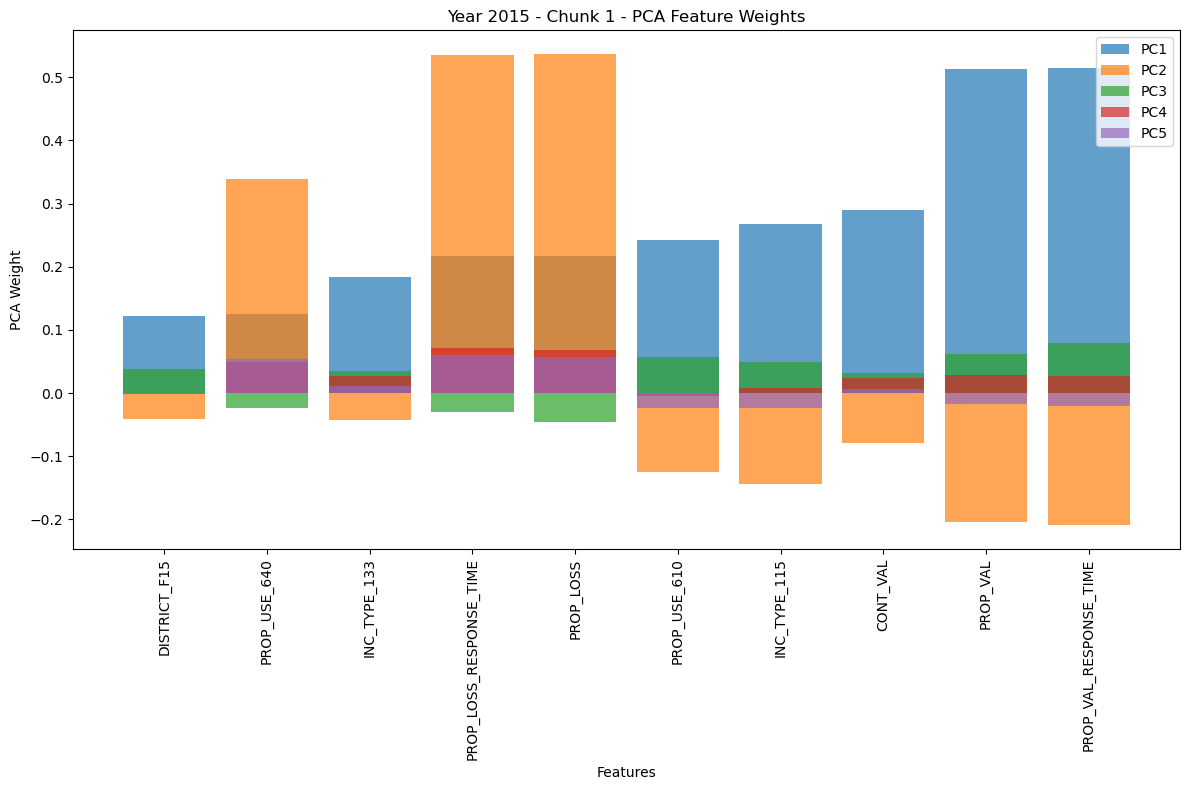

Explained variance by each principal component for chunk 1: [0.0045194  0.00398537 0.00370422 0.00333012 0.00315033]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,30,32,33,35,36,38,39,40,42,43,44,45,46,48,51,57,65,66,69,77,80,91,95,99,104,105,107,108,113,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,149,150,152,153,154,155,156,158,160,161,162,163,165,166,168,169,170,171,172,174,175,176,180,184,185,187,188,189,190,191,193,194,195,196,197,198,199,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226,228,229,230,231,232,234,235,236,237,238,239,240,241,242,243,244,246,247,248,249,251,252,254,255,256,257,258,259,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340

Processing chunk 1


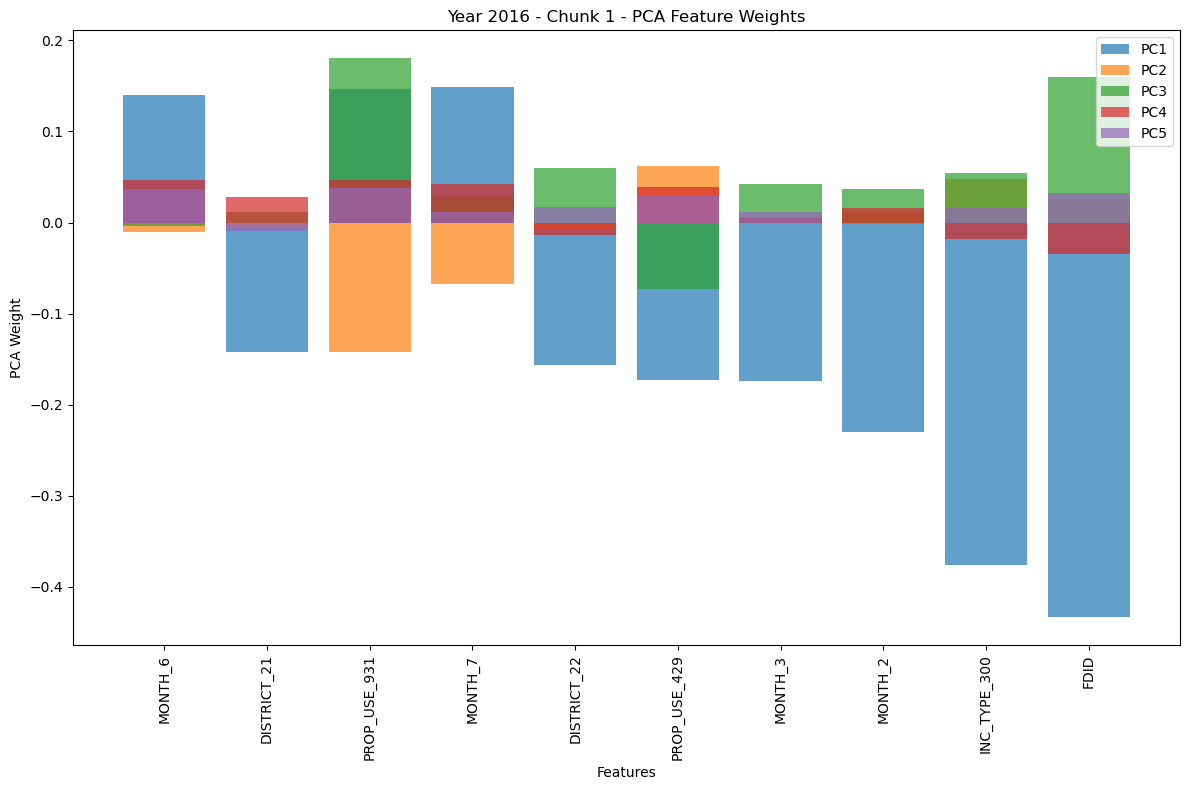

Explained variance by each principal component for chunk 1: [0.00589538 0.00350886 0.00320667 0.00298946 0.00296477]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (9,11,12,13,15,16,17,18,19,22,23,24,27,28,30,32,33,35,38,39,40,43,44,45,46,48,51,65,66,69,77,80,87,95,96,99,105,107,108,113,117,120,123,141,143,145,150,154,169,170,171,174,175,176,180,210,241,268,270,279,282,291,305,363,374,434,442,449,460,465,466,467,479,487,493,495,500,525,528,532,536,539,544,545,553,558,569,573,574,583,586,587,588,590,591,592,593,596,597,598,600,601,602,605,606,608,609,610,611,613,615,616,617,620,621,628,631,635,636,644,645,646,673,674,676,681,683,685,686,688,689,691,692,697,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,80

Processing chunk 2


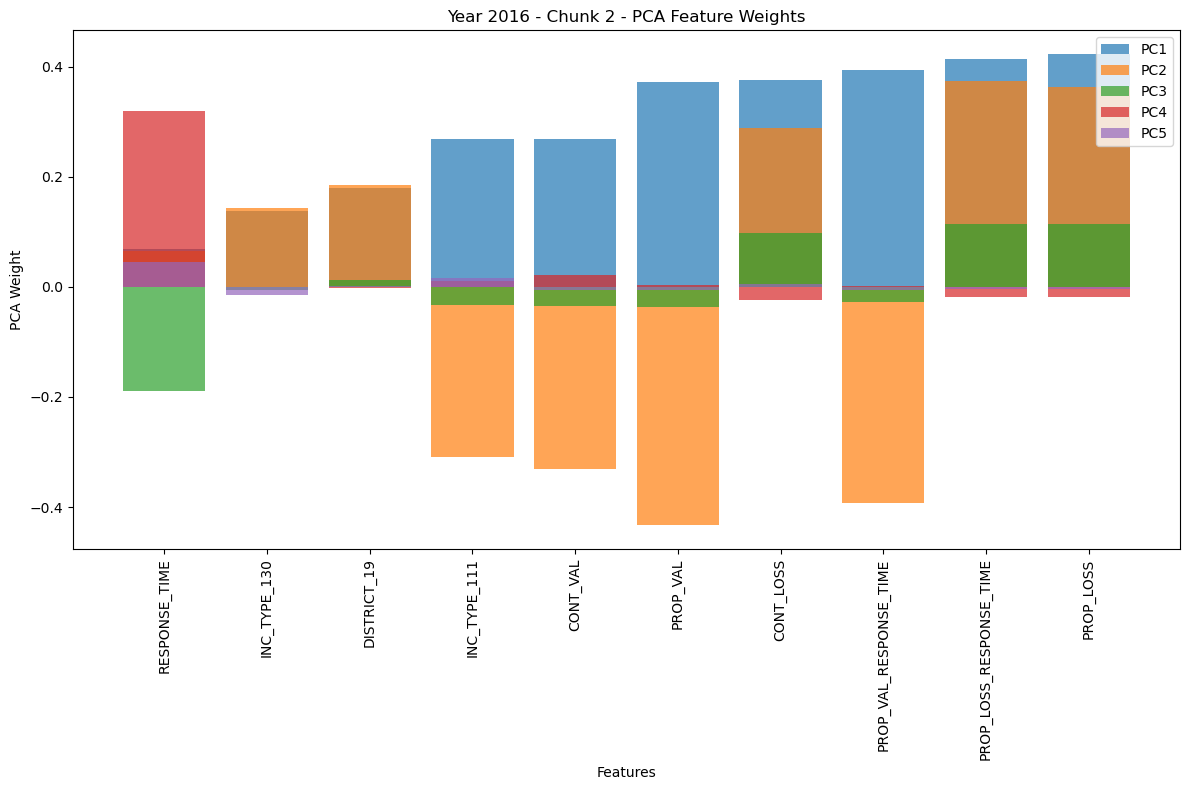

Explained variance by each principal component for chunk 2: [0.01277512 0.01100731 0.00976426 0.00806324 0.0072554 ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (14,23,24,25,43,47,73,75,83,87,91,95,104,108,115,121,122,123,124,136,141,143,144,145,148,151,157,159,162,164,171,174,175,176,177,178,179,180,181,182,183,186,192,200,210,212,223,225,226,227,233,241,245,250,253,261,268,270,279,281,282,291,305,363,374,375,395,399,418,434,438,441,442,444,449,460,465,466,467,471,479,486,487,491,492,493,495,496,498,500,506,507,525,526,535,539,540,547,590,591,599,605,610,621,627,628,630,631,680,681,684,685,687,692,693,694,697,698,700,701,702,703,704,705,706,709,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,8

Processing chunk 3


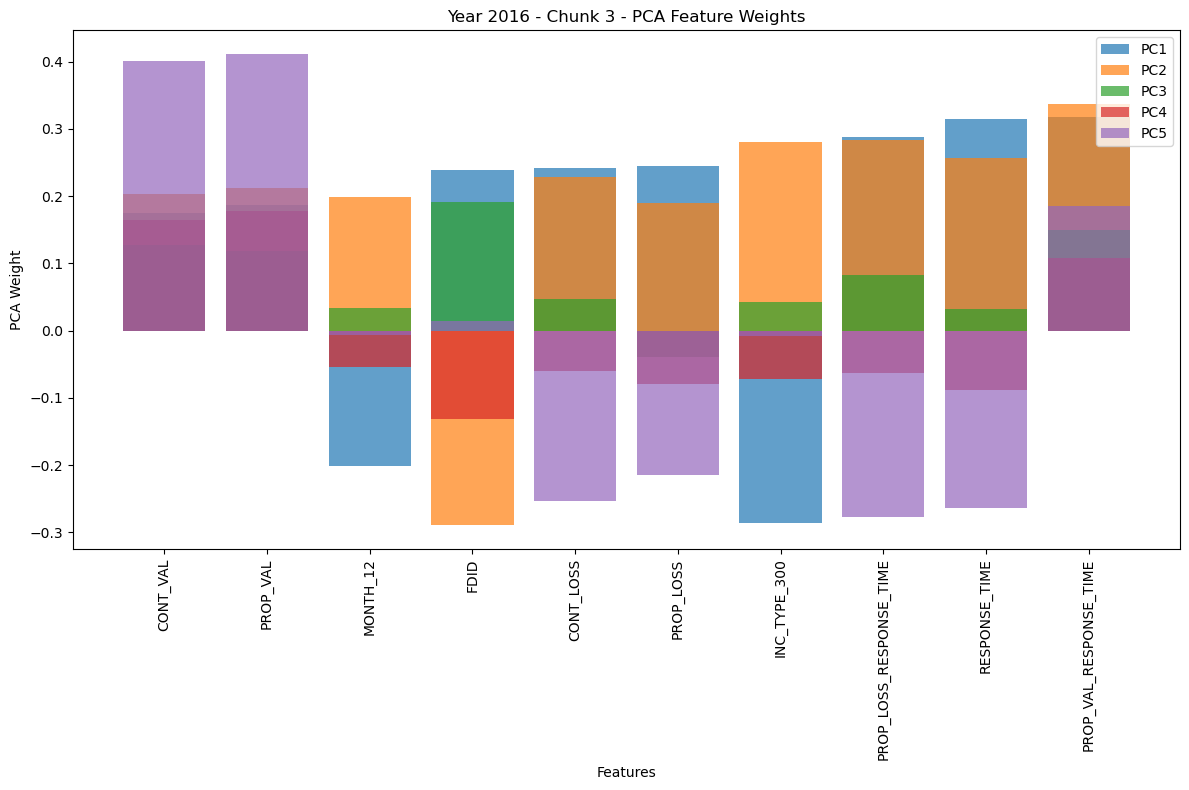

Explained variance by each principal component for chunk 3: [0.00534418 0.00487569 0.00387777 0.00379408 0.00356371]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (11,13,14,16,17,18,19,25,27,28,30,35,43,44,45,48,49,51,59,75,83,93,95,96,99,108,120,121,122,124,136,144,150,154,162,167,169,170,173,212,225,226,388,395,399,492,494,496,506,522,527,536,547,586,587,590,592,593,594,597,598,599,601,602,608,610,615,621,627,631,634,635,636,637,644,645,646,678,683,685,689,691,697,698,705,709,712,775,807,890,924,925,946,947,955,959,960,961,962,963,965,968,970,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1017,1033,1034,1035,1036,1037,1038,1049,1050,1051,1052,1053,1059,1062,1063,1064,1065,1067,1068,1070,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 4


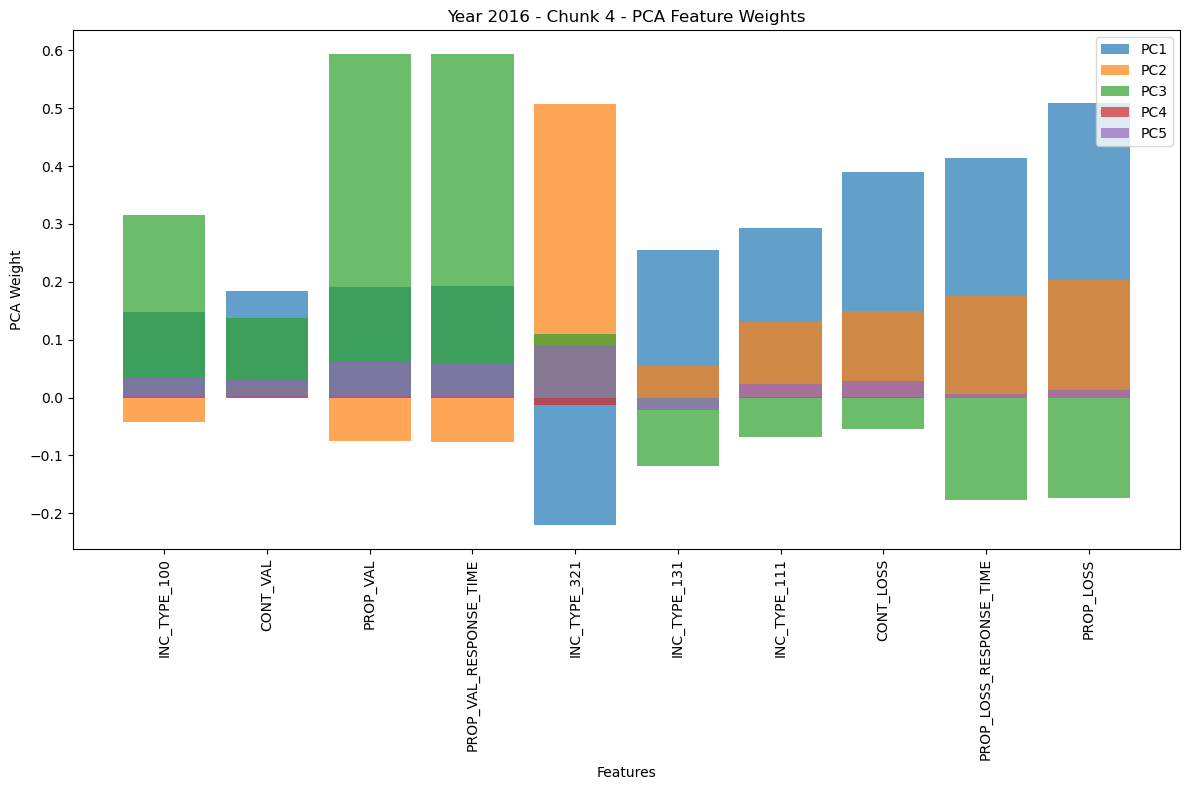

Explained variance by each principal component for chunk 4: [0.00918618 0.00763809 0.00715343 0.00674617 0.00660475]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (11,12,17,18,28,38,40,47,48,49,51,59,61,83,95,99,104,137,139,146,160,271,282,304,340,353,378,522,526,539,540,552,587,597,598,600,601,602,608,613,619,629,630,632,633,634,635,636,637,644,645,646,678,680,683,689,691,693,697,703,705,709,777,778,787,868,870,911,912,940,948,955,957,959,961,964,965,967,970,972,974,992,1003,1016,1031,1038,1058,1059,1066,1068,1071,1073,1074,1075,1076,1077,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 5


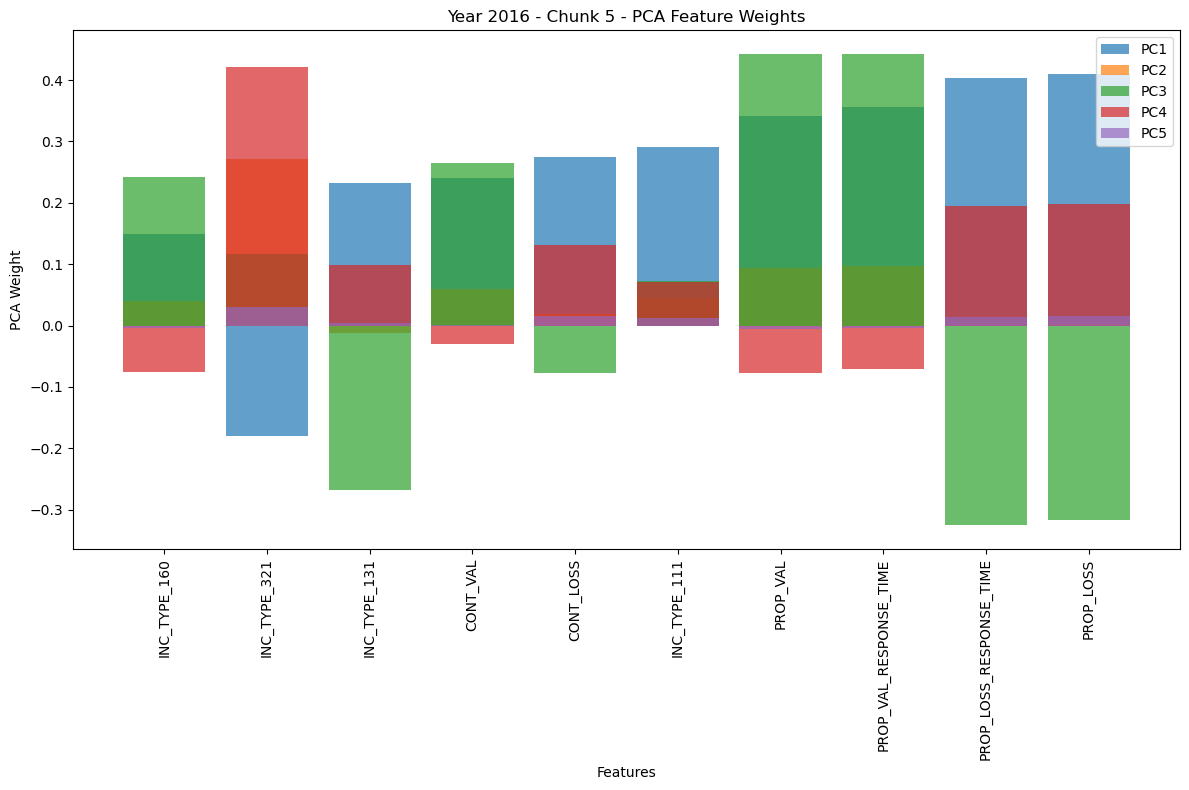

Explained variance by each principal component for chunk 5: [0.00870516 0.00765713 0.00704486 0.00633836 0.00595002]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,14,16,19,23,24,26,27,30,35,36,40,42,44,57,61,69,73,74,80,83,93,95,96,104,117,139,141,142,143,146,148,157,158,159,164,167,169,174,175,176,179,181,182,194,195,201,205,210,211,224,225,226,237,254,257,262,268,269,282,304,340,353,374,378,382,384,386,390,392,393,394,396,398,403,405,408,410,412,413,415,416,419,424,425,434,465,466,488,525,528,532,536,539,552,586,587,591,592,594,600,605,613,615,618,619,627,629,632,633,673,674,683,689,692,697,698,702,711,774,777,778,779,787,823,868,870,896,911,912,927,948,951,955,958,960,961,966,970,974,986,992,995,1003,1015,1023,1026,1028,1029,1030,1032,1045,1046,1047,1048,1054,1055,1056,1059,1060,1061,1068,1071,1073,1079,1081,1082,1083,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1114,1115,1116,1118,1120,1122,1123,1124,1125,1126,1127,1128,1129,1130,1135,1139,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,

Processing chunk 6


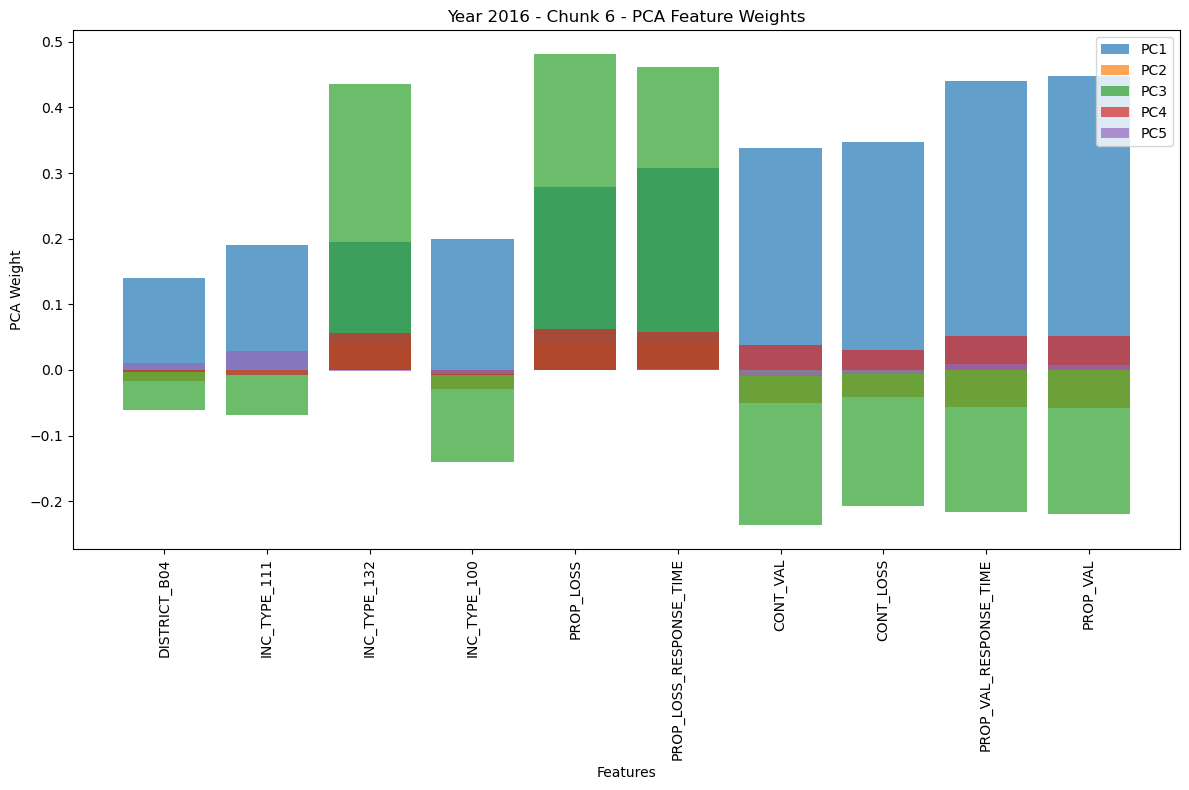

Explained variance by each principal component for chunk 6: [0.00988769 0.00817643 0.00782065 0.00656745 0.00603672]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,14,16,17,18,19,23,24,28,30,35,36,40,42,44,46,57,59,61,65,69,75,80,96,103,117,137,142,157,158,159,160,167,169,174,175,176,181,182,194,195,201,205,211,224,225,226,237,254,257,262,268,269,271,382,384,386,390,392,393,394,396,398,403,405,408,410,412,413,415,416,419,424,425,434,438,441,444,460,465,466,471,488,501,506,507,528,536,539,545,586,587,588,592,593,594,598,605,608,610,611,613,615,618,619,621,627,633,673,674,676,677,680,683,689,693,695,699,702,703,705,708,709,711,774,779,823,888,896,900,903,907,916,940,948,950,951,957,958,960,965,966,967,968,969,981,984,985,986,995,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1018,1019,1020,1021,1022,1024,1025,1027,1038,1039,1040,1041,1042,1043,1044,1057,1073,1075,1078,1081,1084,1098,1113,1117,1119,1121,1131,1132,1133,1134,1136,1137,1138,1140,1141,1142,1143,1144,1145,1146,1147,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,11

Processing chunk 7


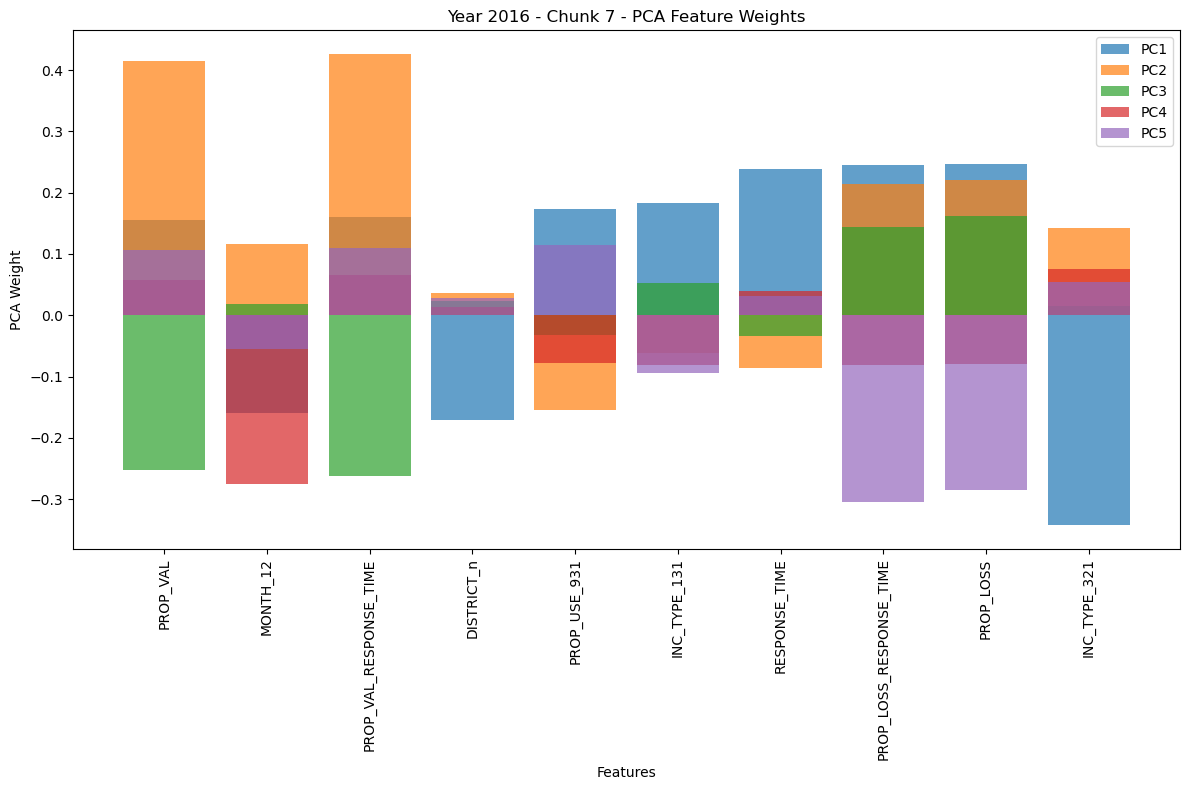

Explained variance by each principal component for chunk 7: [0.00573066 0.00463866 0.00434016 0.00423546 0.0039853 ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,14,17,18,19,23,24,28,30,36,40,42,44,45,46,47,59,61,65,73,75,96,103,117,120,122,125,128,131,133,150,151,154,157,160,164,167,168,170,174,176,177,178,181,182,183,186,192,200,206,209,218,220,223,225,226,229,230,233,237,240,248,253,268,270,388,389,390,394,434,460,465,479,487,494,498,506,525,528,532,539,540,545,586,588,590,592,594,598,599,605,608,610,611,613,615,618,619,621,627,633,677,685,687,689,691,692,693,695,698,699,702,708,782,784,787,791,799,800,802,804,807,808,810,811,817,823,833,834,840,841,847,849,850,851,852,858,859,860,863,869,875,882,883,888,890,894,907,920,927,934,950,951,955,958,959,967,968,969,983,986,987,988,989,990,992,1000,1070,1072,1102,1108,1113,1139,1140,1145,1146,1149,1150,1156,1158,1159,1160,1181,1192,1193,1195,1273,1274,1275,1276,1277,1281,1282,1284,1285,1286,1288,1289,1291,1295,1296,1297,1300,1301,1306,1307,1308,1309,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1

Processing chunk 8


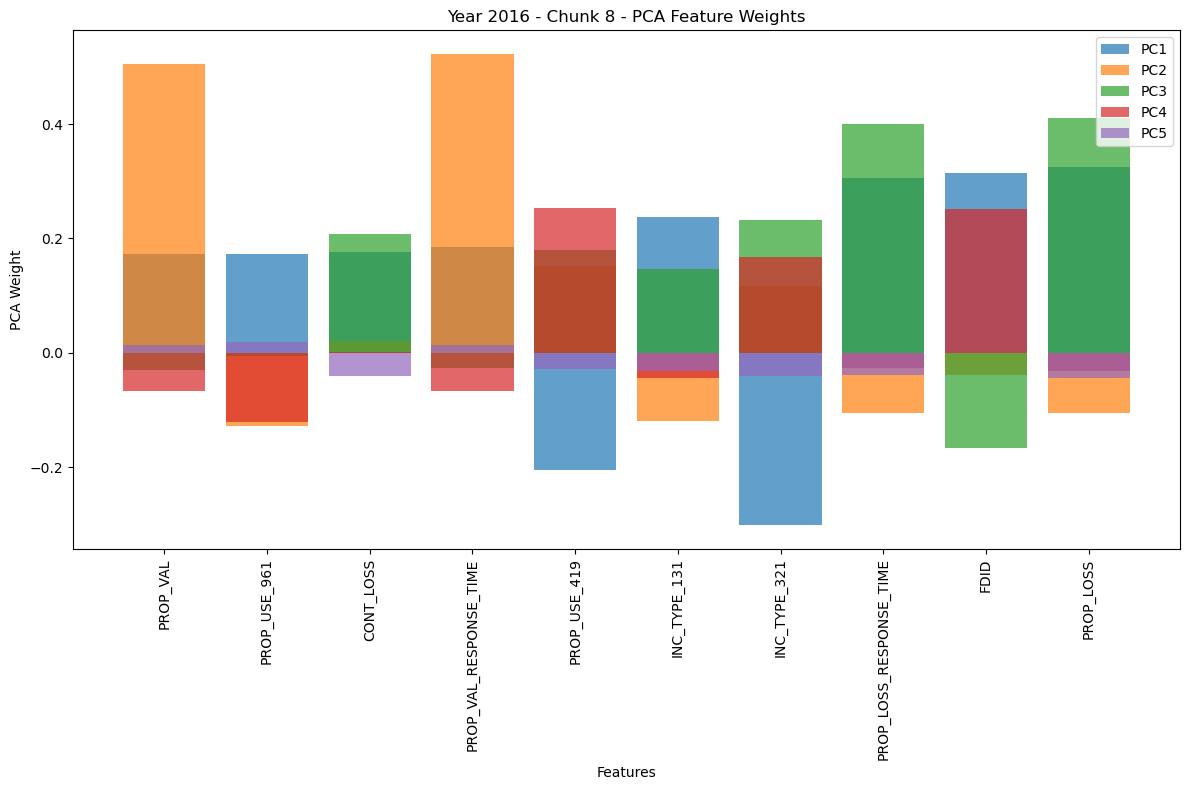

Explained variance by each principal component for chunk 8: [0.00528637 0.00437566 0.0039882  0.00348634 0.00346643]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (16,23,35,36,38,57,65,73,83,105,108,117,125,131,142,144,149,154,159,160,162,164,169,175,206,209,211,220,224,225,227,229,230,235,237,238,240,241,245,248,250,251,257,261,269,271,272,276,281,348,375,377,379,388,389,390,394,418,435,468,471,479,490,494,498,501,505,506,528,536,540,588,590,599,618,627,676,685,687,691,692,695,697,702,704,705,706,708,709,712,713,775,782,784,787,791,799,800,802,804,807,808,810,811,817,823,833,834,840,841,847,850,851,852,858,859,860,863,869,872,874,876,879,881,883,885,887,888,889,890,894,896,916,920,927,934,948,950,954,955,959,964,969,972,981,985,987,988,989,990,992,1041,1042,1044,1069,1070,1071,1072,1075,1084,1102,1108,1113,1139,1140,1145,1146,1148,1150,1154,1156,1158,1159,1160,1181,1192,1193,1194,1195,1210,1220,1238,1239,1247,1269,1270,1271,1272,1279,1280,1283,1285,1286,1287,1290,1292,1293,1294,1295,1298,1299,1301,1302,1303,1304,1305,1311,1312,1315,1316,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1

Processing chunk 9


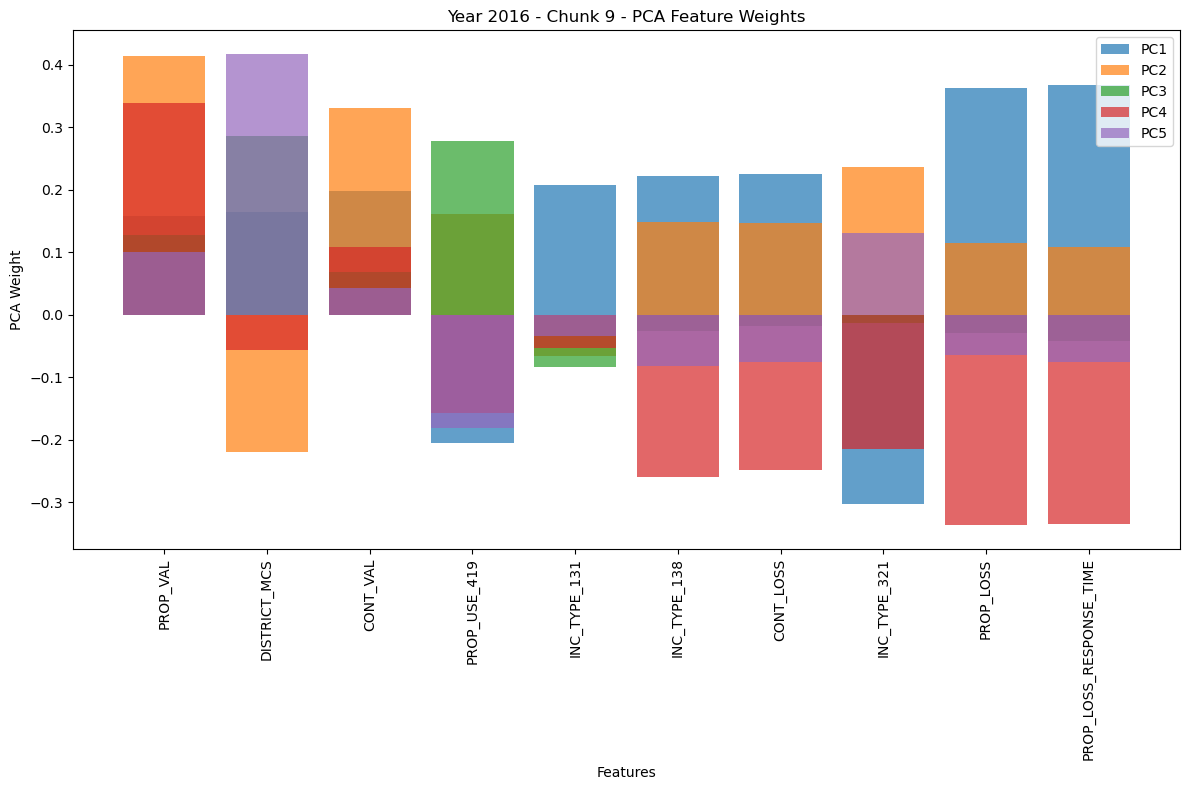

Explained variance by each principal component for chunk 9: [0.00601369 0.00509683 0.00490054 0.0047301  0.00446737]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,24,26,35,38,56,59,61,74,75,81,83,105,108,120,122,128,133,141,142,143,144,149,150,168,169,170,173,174,175,176,183,186,192,200,210,211,218,224,226,235,238,241,250,251,253,257,268,269,271,272,276,363,374,377,379,388,399,418,434,444,460,463,465,468,471,479,485,487,490,491,492,494,498,525,527,532,539,547,594,597,599,600,601,602,605,606,611,621,629,631,632,674,676,677,679,687,693,697,698,704,706,708,709,711,713,775,849,872,874,875,876,879,881,887,888,889,890,896,903,908,915,916,927,934,956,957,958,959,960,964,967,970,983,986,999,1043,1068,1149,1154,1158,1241,1269,1270,1278,1285,1286,1287,1288,1294,1296,1301,1310,1311,1313,1314,1317,1362,1379,1392,1393,1394,1412,1417,1422,1430,1436,1442,1455,1456,1457,1475,1494,1495,1496,1497,1498,1499,1500,1501,1502,1504,1505,1506,1507,1508,1509,1510,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1524,1525,1526,1527,1529,1530,1531,1533,1534,1542,1543,1544,1545,1554,1573,1574,1575,1576,1

Processing chunk 10


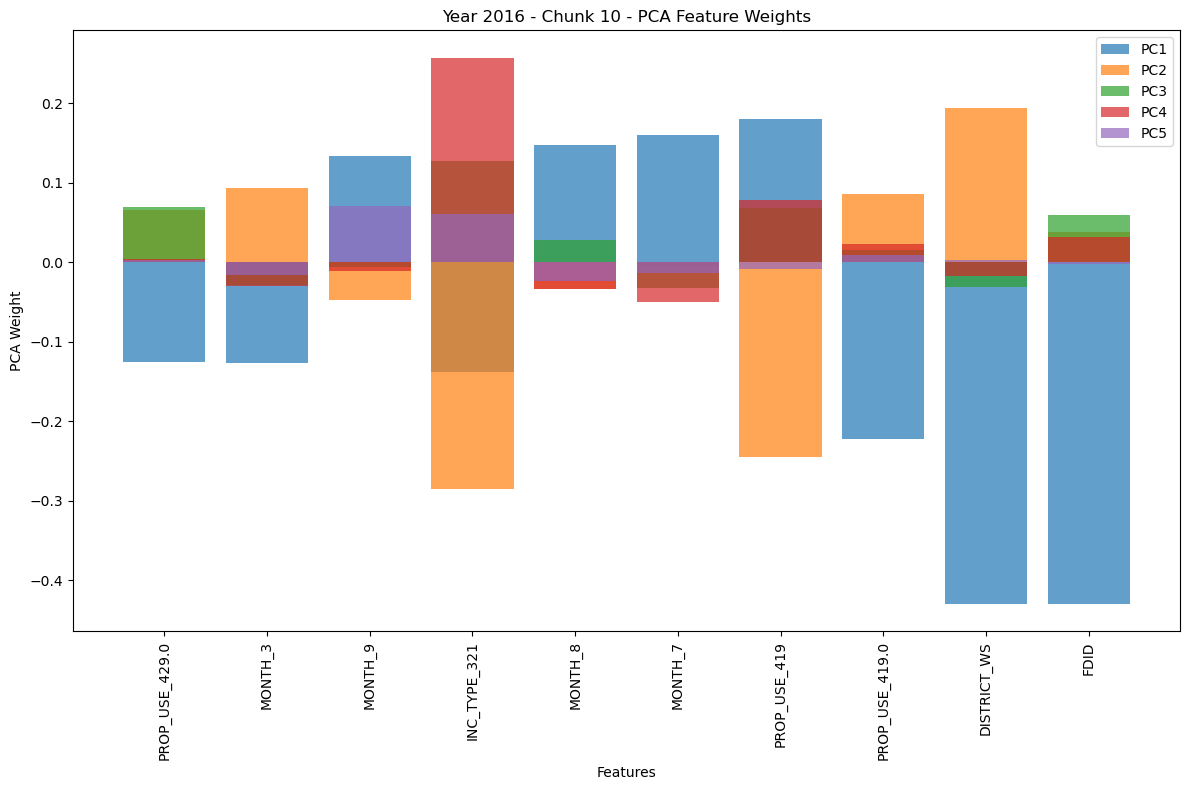

Explained variance by each principal component for chunk 10: [0.00573941 0.00473071 0.00423814 0.00375499 0.0034613 ]
Processing chunk 11


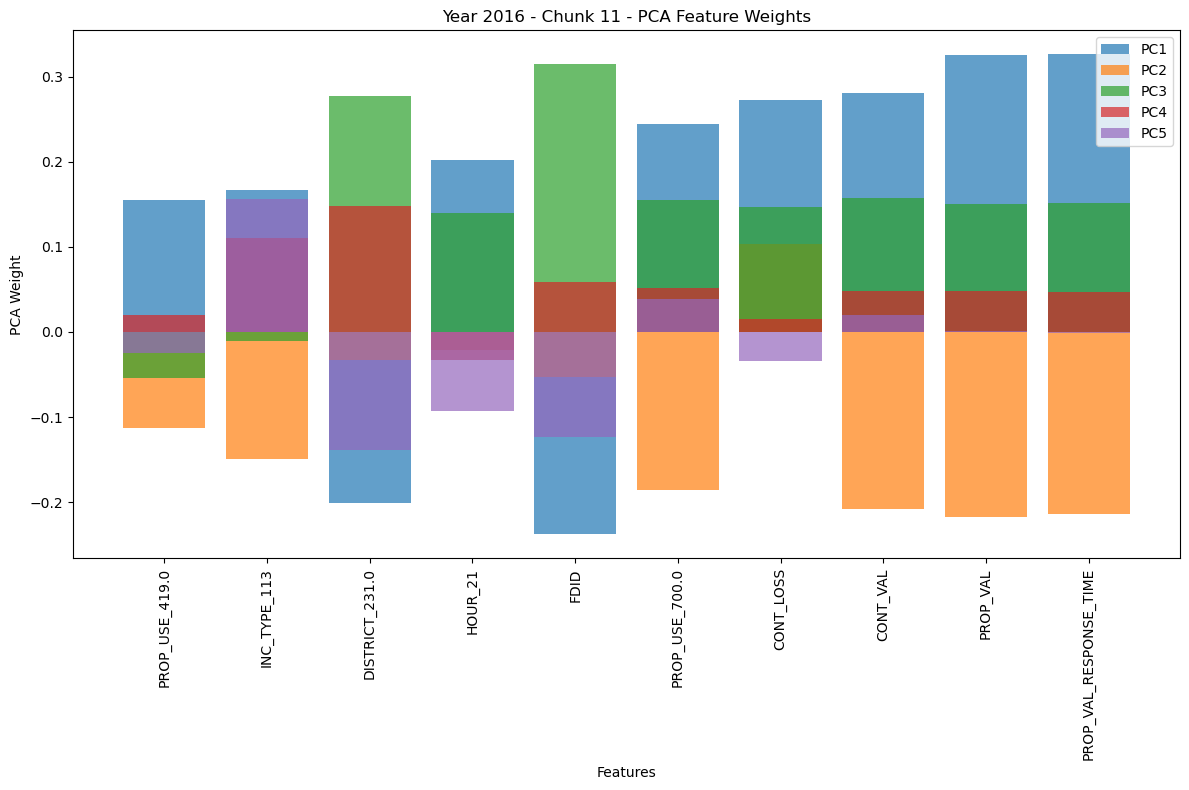

Explained variance by each principal component for chunk 11: [0.04791534 0.03956855 0.03719788 0.03174228 0.0299469 ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (25,70,71,72,73,74,75,76,82,84,85,86,87,93,94,95,97,98,100,101,102,104,105,106,107,108,109,110,112,113,114,115,116,117,118,119,121,122,124,125,126,127,128,129,130,132,133,135,136,137,138,139,140,141,143,145,146,147,148,149,150,151,152,153,154,155,156,157,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,205,206,208,209,210,211,212,213,214,215,216,217,219,220,222,223,224,225,226,227,229,231,232,233,234,235,236,237,239,240,242,243,244,245,246,248,249,250,252,253,254,255,256,257,258,259,261,262,263,264,265,266,267,269,270,271,272,273,274,276,277,279,280,281,282,285,286,287,288,289,290,291,292,294,295,297,298,299,301,302,303,304,305,306,307,308,309,310,311,314,315,316,317,318,320,321,322,323,324,325,326,329,330,331,332,334,337,339,340,341,342,343,344,345,347,348,349,350,351,352,353,356,357,358,359,360,361,362,364,365,366,367

Processing chunk 1


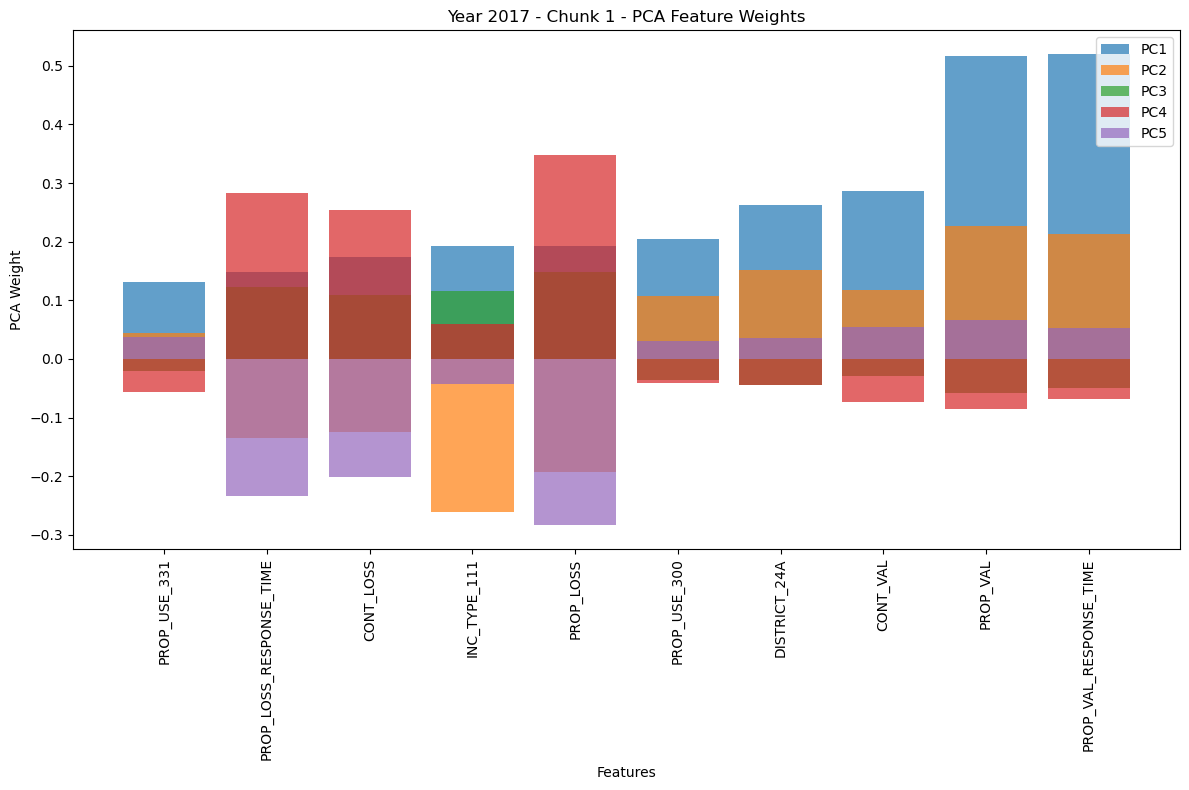

Explained variance by each principal component for chunk 1: [0.00345016 0.00289204 0.0027486  0.00267803 0.0026487 ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (25,78,79,80,81,83,89,90,91,92,99,103,123,134,142,144,158,159,169,198,199,201,206,209,210,211,223,224,225,230,231,233,234,242,250,253,262,263,269,270,277,278,279,280,281,284,285,286,288,289,294,298,303,305,306,312,313,314,315,319,323,324,325,327,328,330,335,339,340,341,342,343,344,345,346,347,348,349,350,351,352,354,356,357,360,363,364,365,367,369,374,376,380,383,387,393,394,397,399,401,402,409,410,412,416,419,421,428,432,441,442,451,459,461,468,469,471,472,475,476,479,480,482,483,484,485,486,490,491,492,493,495,496,499,500,503,507,509,512,517,526,538,582,592,599,614,622,640,641,652,654,660,663,667,676,678,680,704,712,717,752,807,814,815,816,817,818,819,820,821,822,823,824,826,829,830,832,836,838,839,840,841,843,844,845,846,847,851,852,853,855,856,858,859,861,862,863,864,865,867,868,869,871,872,873,874,875,876,885,887,888,889,890,891,892,894,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,919,920,921,924,926,

Processing chunk 2


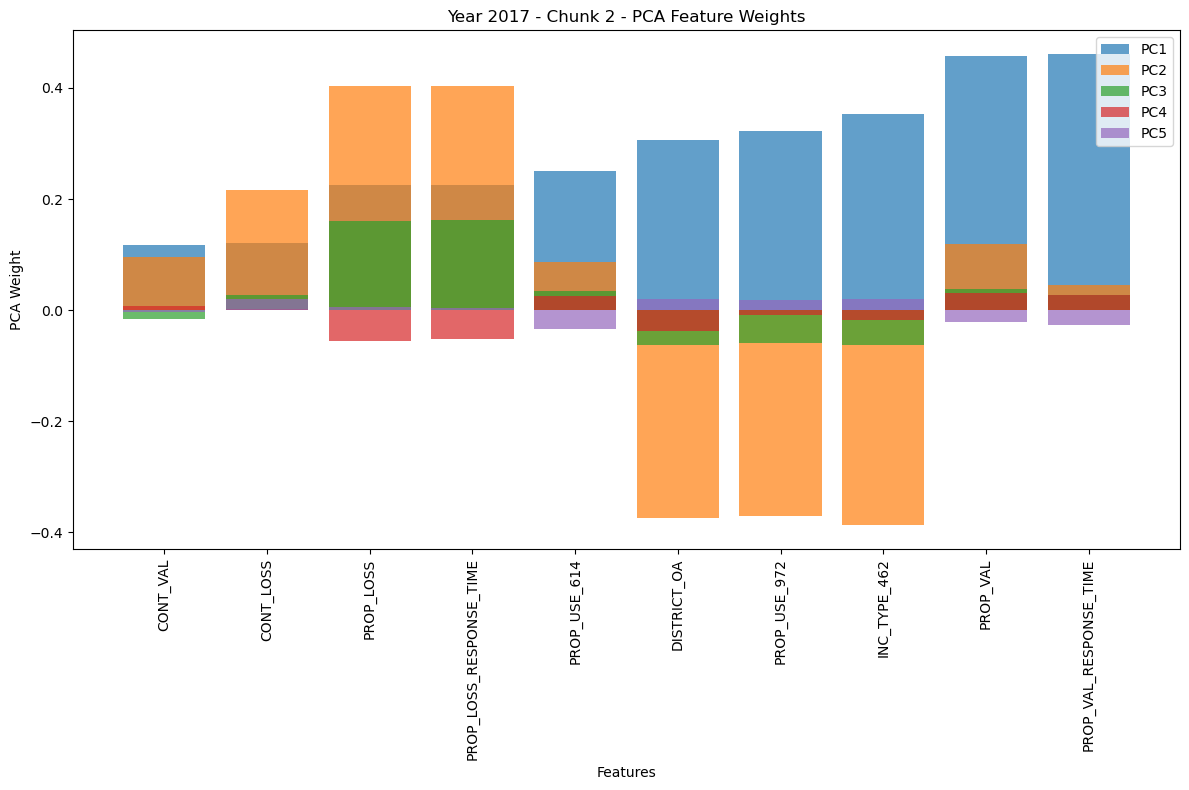

Explained variance by each principal component for chunk 2: [0.00365281 0.00278951 0.00265905 0.00238541 0.00233351]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (23,25,66,70,71,72,124,187,189,198,199,201,206,209,210,211,221,223,224,225,231,233,234,242,253,260,262,263,269,270,277,279,280,283,286,288,289,294,298,305,314,315,323,324,325,330,336,338,339,340,341,342,344,345,348,349,350,351,355,356,360,364,365,369,372,373,374,377,380,381,383,392,394,402,413,456,466,474,477,478,487,491,515,520,547,562,569,575,577,578,589,592,595,596,597,599,605,616,620,649,652,654,656,660,663,665,666,669,670,676,678,679,680,685,688,689,696,717,718,720,721,723,727,740,752,761,764,833,834,837,842,848,849,850,854,860,866,870,877,878,879,880,881,882,883,884,886,893,895,897,898,899,900,922,932,938,941,942,951,952,980,982,983,984,986,994,998,1018,1019,1020,1024,1051,1052,1053,1054,1080,1082,1092,1093,1099,1101,1103,1104,1105,1106,1107,1108,1109,1110,1114,1121,1122,1123,1126,1127,1128,1130,1131,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158

Processing chunk 3


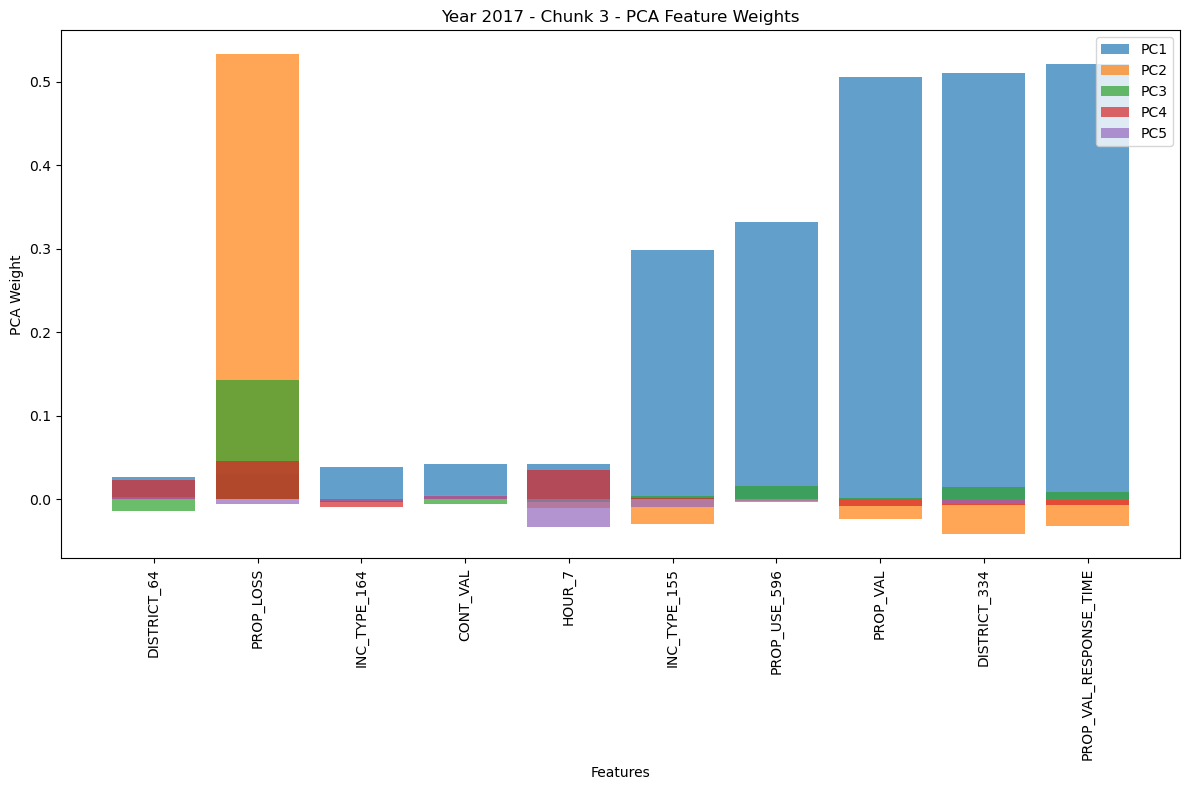

Explained variance by each principal component for chunk 3: [0.00558236 0.00423937 0.00330458 0.00317449 0.0029505 ]
Processing chunk 4


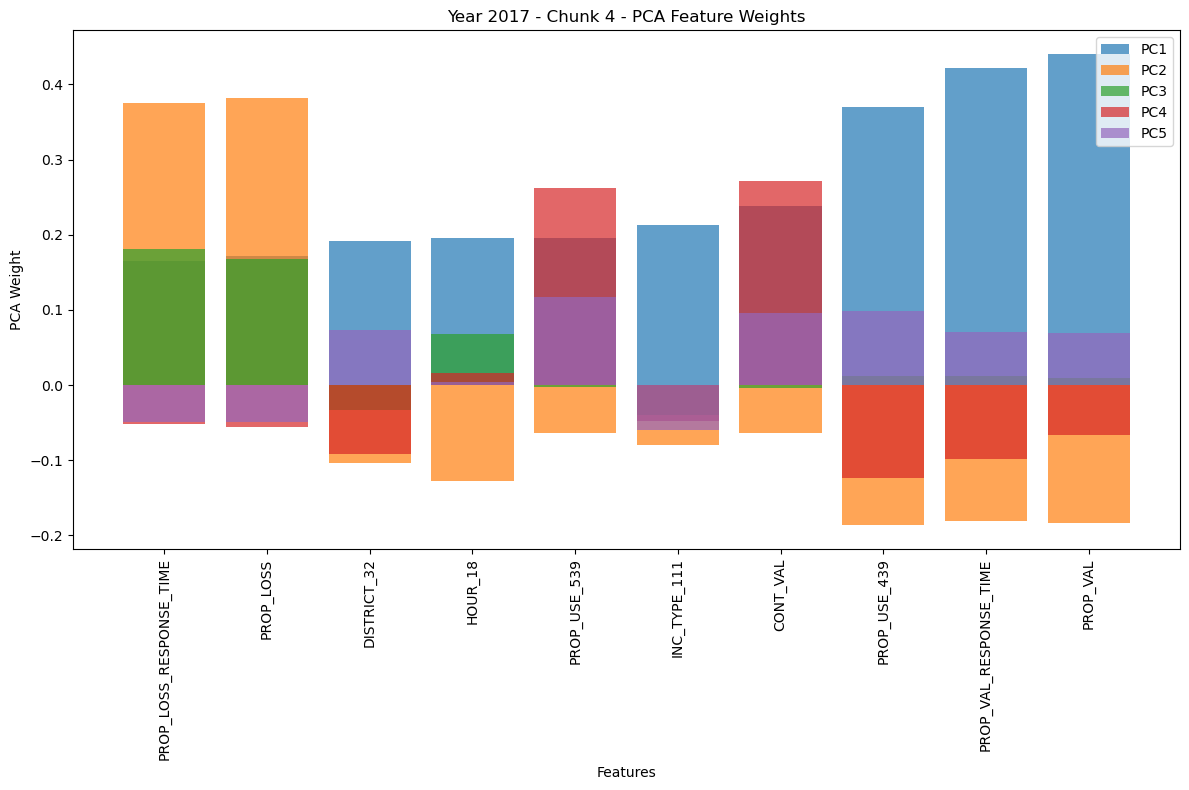

Explained variance by each principal component for chunk 4: [0.02483761 0.02227157 0.02123483 0.01939532 0.01809993]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (14,23,25,34,35,40,42,45,47,51,60,65,76,92,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,144,146,147,149,150,151,154,157,158,159,162,164,166,171,174,180,181,183,184,185,186,187,188,189,190,192,193,194,195,196,197,198,200,201,202,203,204,205,206,207,210,211,212,213,214,215,216,217,218,219,220,221,223,224,225,226,227,228,229,231,232,233,234,235,236,237,238,239,240,242,243,244,245,246,248,249,250,251,252,253,254,256,257,258,259,260,261,262,265,266,267,268,269,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,370,371,372,373,374,375,376,377,378,379,380,381,382,383

Processing chunk 1


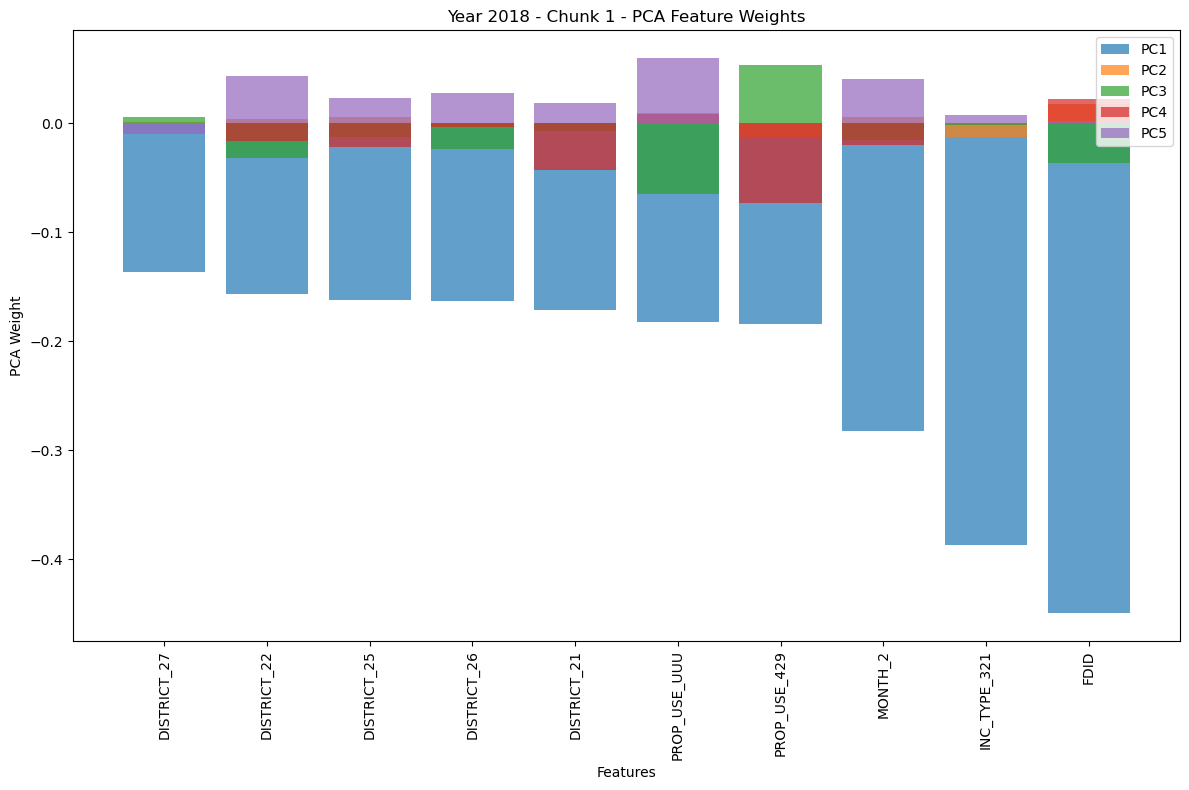

Explained variance by each principal component for chunk 1: [0.00513942 0.00292541 0.00286997 0.00270981 0.0027018 ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (25,34,35,40,42,46,51,59,65,92,115,117,124,137,141,142,144,145,147,148,152,153,156,158,159,160,161,168,170,172,173,175,176,177,178,179,182,191,199,202,209,212,213,222,230,241,247,255,264,270,274,329,361,367,368,369,370,378,385,403,418,420,424,442,465,473,480,487,488,489,492,495,497,498,502,503,505,506,508,510,517,518,537,543,547,551,555,557,566,569,572,574,578,580,582,584,586,603,605,607,610,618,620,622,626,627,628,639,641,643,646,663,693,700,708,717,719,723,768,773,775,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899

Processing chunk 2


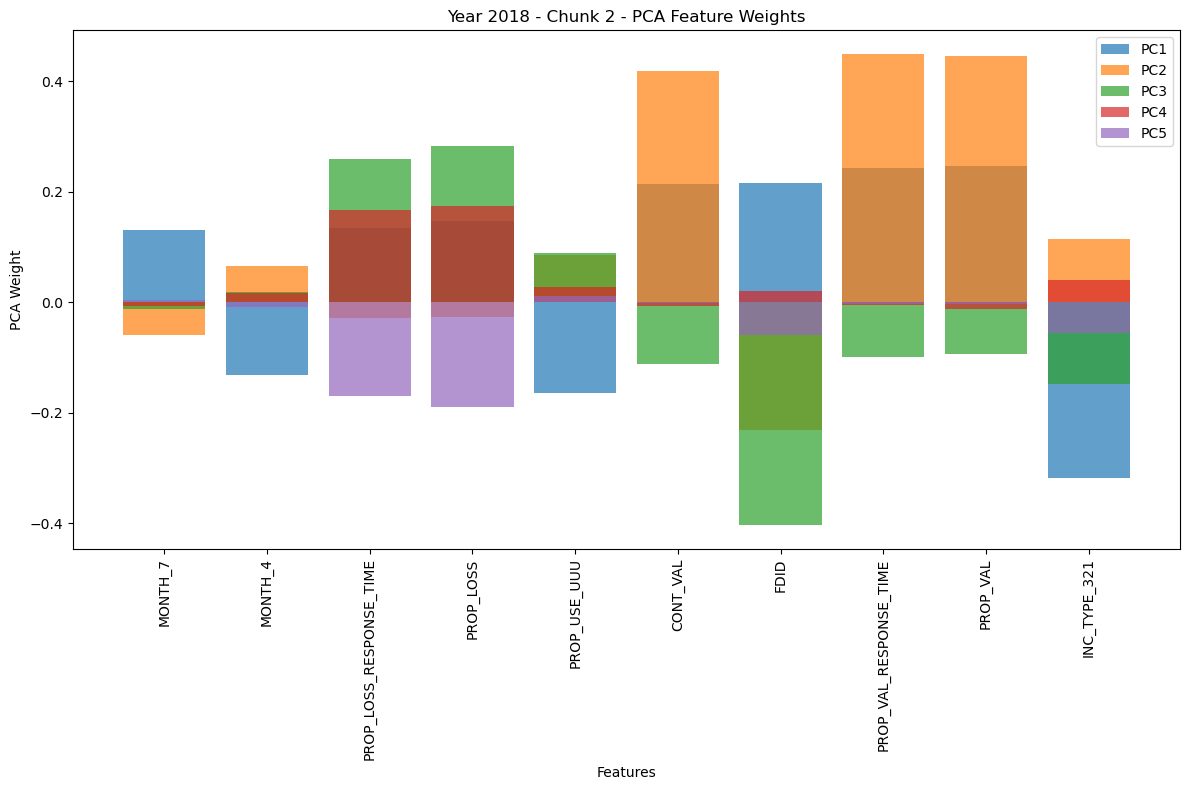

Explained variance by each principal component for chunk 2: [0.00618753 0.00578066 0.0047987  0.00453014 0.00419817]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (11,12,13,16,17,18,19,24,25,26,27,29,34,35,42,43,45,47,51,59,62,72,73,76,94,96,97,115,117,124,137,143,144,147,155,158,159,163,165,167,169,202,208,212,213,263,329,361,370,378,385,424,432,452,517,537,541,548,560,561,566,588,600,644,645,649,650,652,653,657,660,661,664,668,670,671,673,678,680,685,697,730,731,737,738,739,740,741,770,773,775,780,921,928,962,978,979,981,984,986,987,988,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1040,1042,1058,1060,1061,1062,1063,1075,1076,1077,1086,1087,1088,1089,1090,1092,1093,1094,1095,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 3


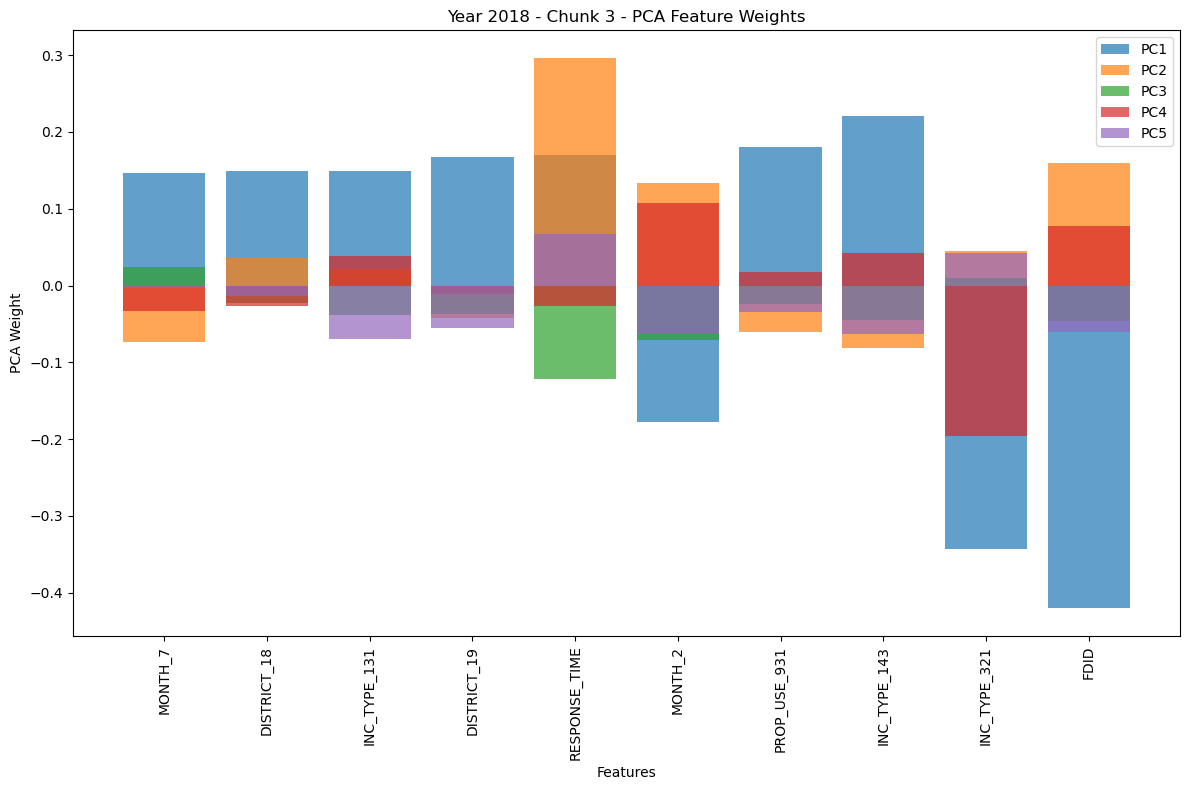

Explained variance by each principal component for chunk 3: [0.00926102 0.00578653 0.00525289 0.00501702 0.00479622]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (11,12,34,40,46,47,51,59,62,73,117,139,149,153,227,275,282,333,350,541,560,600,645,649,659,661,664,670,671,673,678,685,690,708,728,730,731,737,738,739,740,741,768,773,775,781,908,909,926,932,934,954,959,962,963,986,990,992,1015,1041,1043,1059,1063,1083,1085,1096,1097,1101,1105,1106,1108,1109,1110,1111,1112,1113,1114,1115,1118,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 4


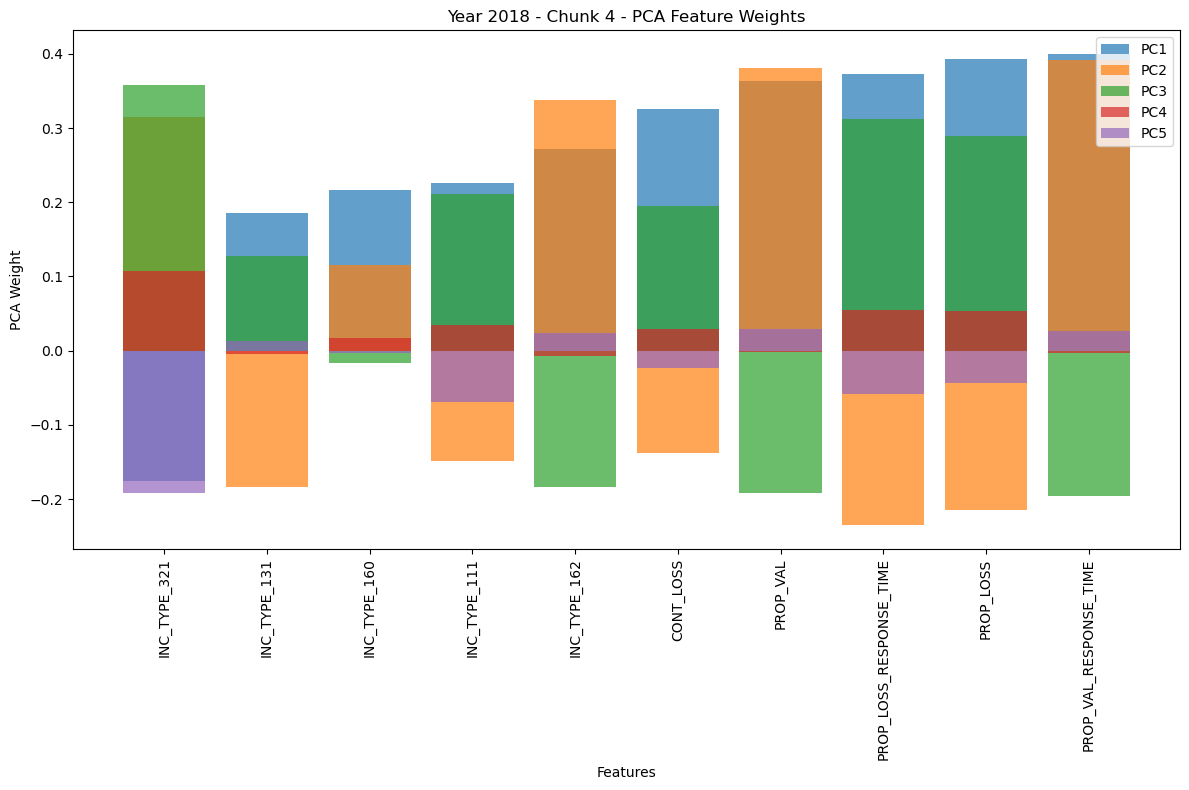

Explained variance by each principal component for chunk 4: [0.00935281 0.00764308 0.00727103 0.00665461 0.00641388]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (13,17,24,40,44,46,60,94,96,115,117,139,141,149,153,163,170,208,227,230,250,275,282,309,321,334,351,361,367,498,505,547,565,566,588,644,645,661,664,666,670,673,680,682,697,708,726,728,768,773,775,780,908,909,910,926,932,934,957,980,984,985,986,987,992,998,1006,1015,1027,1028,1035,1037,1039,1041,1049,1050,1051,1052,1053,1054,1055,1056,1057,1059,1070,1071,1072,1073,1074,1078,1079,1080,1082,1084,1091,1096,1097,1100,1105,1106,1107,1116,1117,1118,1120,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1163,1164,1165,1166,1167,1168,1169,1170,1171,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1

Processing chunk 5


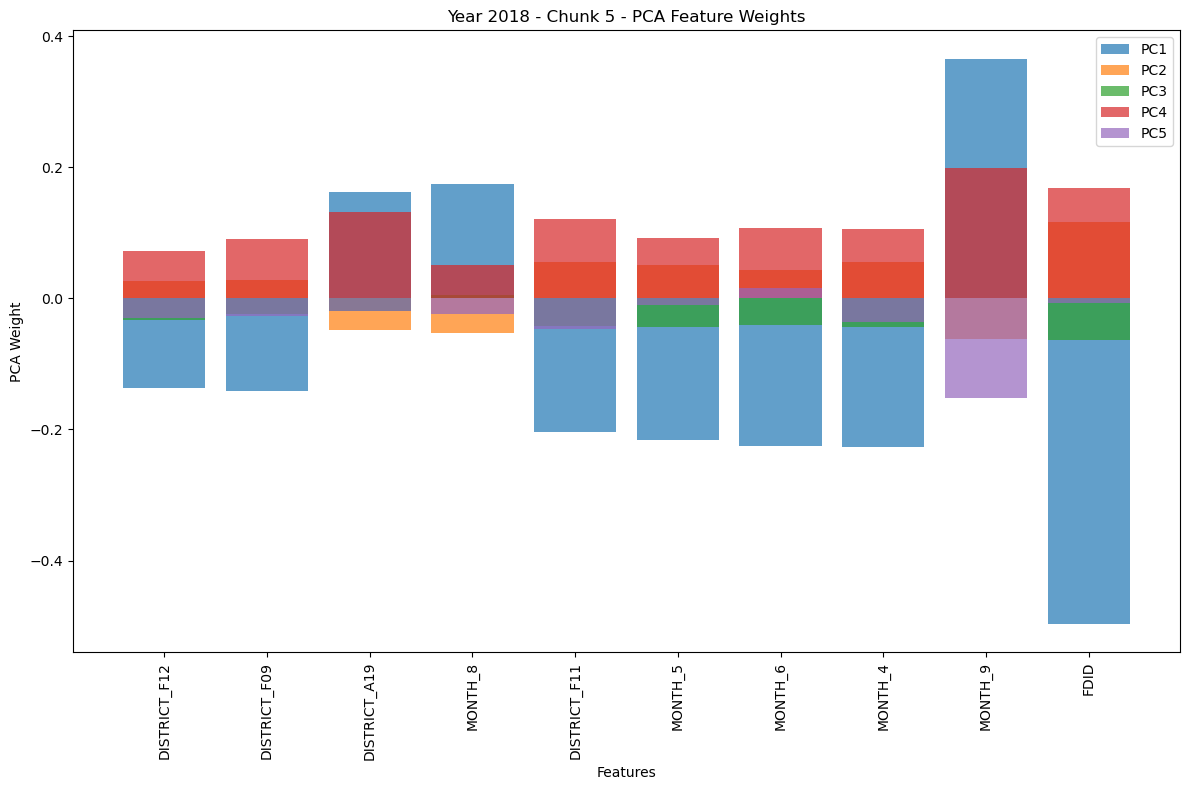

Explained variance by each principal component for chunk 5: [0.00827333 0.00818018 0.00683442 0.00589813 0.00556193]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,18,19,24,26,27,29,44,45,58,60,73,76,92,96,106,115,141,143,152,155,156,165,171,176,177,178,206,239,250,264,309,321,333,334,350,351,361,367,375,377,380,382,385,387,399,410,418,487,498,505,548,553,561,563,566,573,599,644,652,655,661,666,668,670,680,682,685,708,724,726,775,780,781,957,959,964,970,976,980,981,982,983,984,985,987,990,998,1027,1028,1031,1036,1037,1038,1041,1050,1059,1063,1065,1081,1102,1104,1105,1118,1119,1121,1145,1155,1156,1157,1158,1159,1160,1161,1162,1172,1173,1176,1177,1178,1179,1180,1200,1201,1202,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1226,1229,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292

Processing chunk 6


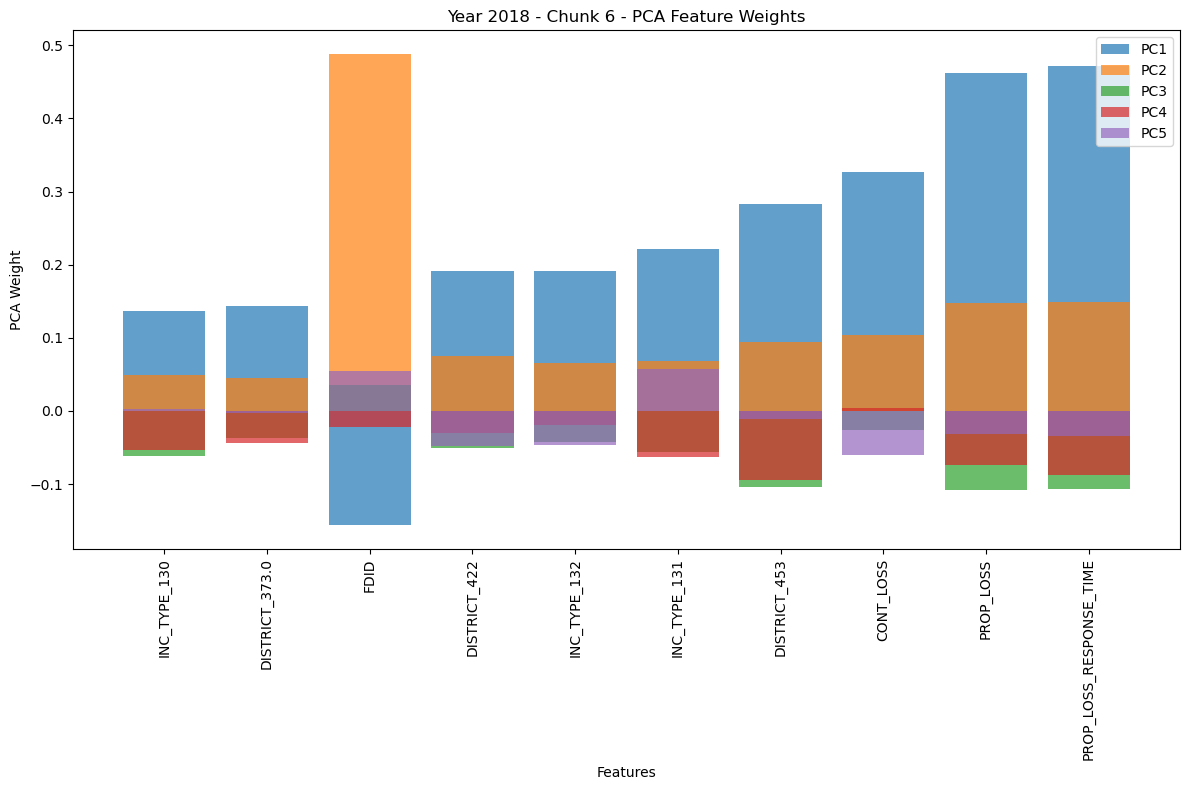

Explained variance by each principal component for chunk 6: [0.00832233 0.00797086 0.00627062 0.00607731 0.00560322]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (14,16,23,24,25,35,43,58,65,74,76,92,96,117,121,124,126,129,132,141,142,145,148,149,150,153,160,161,163,165,176,177,178,193,194,203,204,205,209,211,217,220,223,224,230,231,234,237,239,242,248,256,259,263,267,272,297,307,356,362,367,368,374,375,376,379,381,383,384,386,390,391,392,395,396,397,398,401,409,410,419,487,488,492,498,499,505,518,553,557,563,565,569,574,584,599,600,603,605,607,610,615,618,620,633,635,637,644,645,648,650,659,660,664,667,670,672,673,674,684,685,690,693,696,700,707,711,713,715,717,719,724,771,774,775,776,832,842,891,910,944,963,968,970,971,975,981,983,985,986,1006,1027,1028,1029,1030,1032,1033,1034,1037,1044,1045,1046,1047,1048,1050,1064,1066,1067,1068,1069,1099,1100,1101,1103,1106,1118,1119,1145,1167,1179,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1203,1205,1210,1211,1220,1221,1222,1225,1227,1228,1230,1244,1245,1246,1247,1248,1249,1250,1252,1253,1254,1256

Processing chunk 7


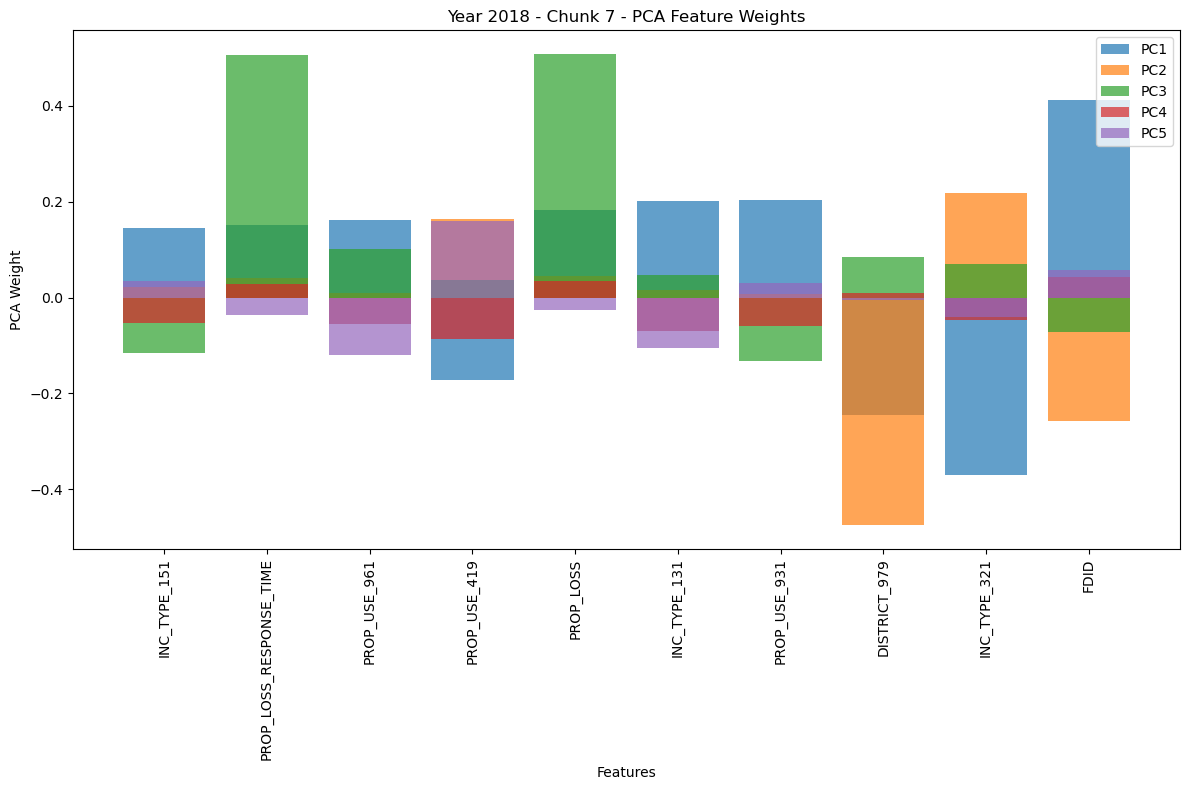

Explained variance by each principal component for chunk 7: [0.00506459 0.00484836 0.00368276 0.00338803 0.00322731]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (9,11,12,13,14,16,17,18,19,20,23,24,25,34,40,43,44,47,65,73,117,121,124,126,129,132,141,142,143,145,148,149,150,152,153,155,156,160,161,170,171,193,194,203,204,205,206,208,209,211,217,220,223,224,231,234,237,242,256,259,263,264,267,272,297,307,356,362,367,368,374,376,377,379,380,381,382,383,384,385,386,387,390,391,392,395,396,397,398,399,401,409,418,419,488,498,499,505,557,558,561,569,573,584,603,605,607,610,613,618,620,633,635,637,650,652,657,664,666,667,668,671,672,674,684,685,693,694,696,697,700,707,711,713,715,717,719,730,731,732,733,773,776,832,842,891,944,959,968,971,975,976,981,984,985,988,1099,1101,1118,1119,1167,1179,1204,1205,1210,1211,1220,1221,1222,1255,1264,1271,1272,1273,1274,1275,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1369,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1390,1391,1392,1393,1394,1395,1396,1397,1398,139

Processing chunk 8


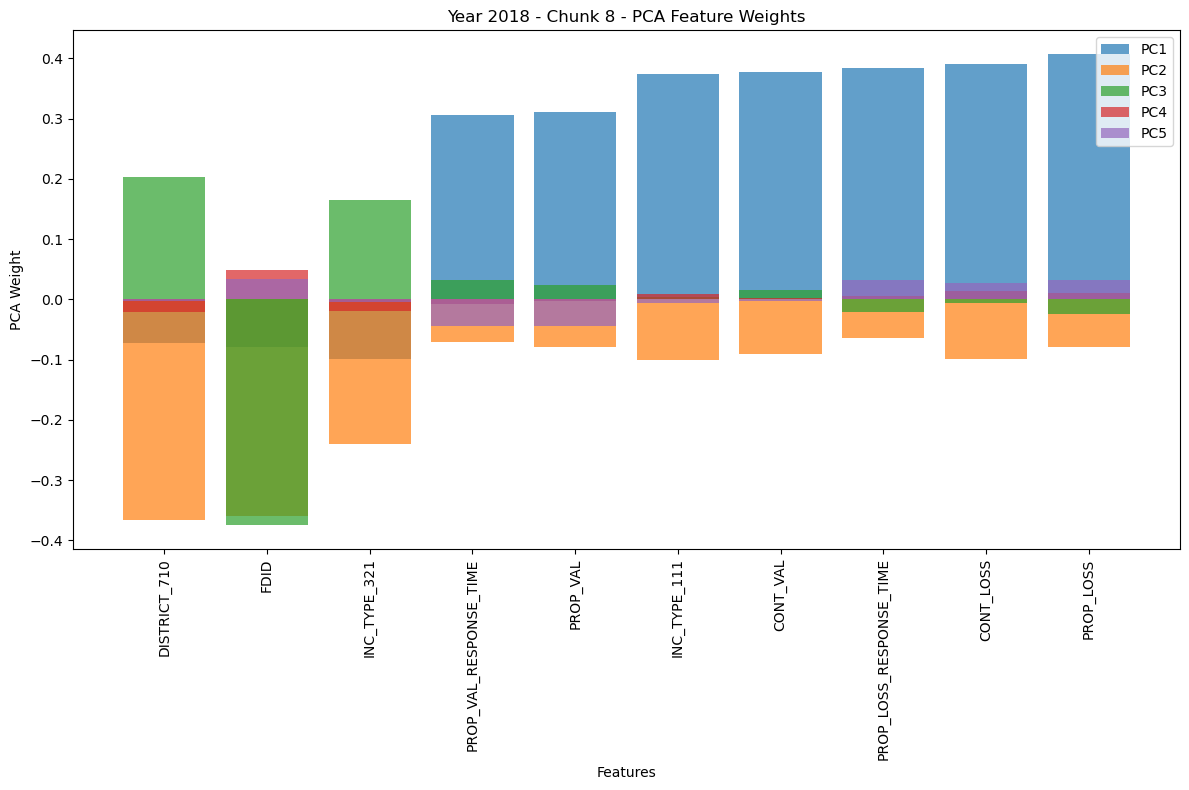

Explained variance by each principal component for chunk 8: [0.01406189 0.01197734 0.00930456 0.00767709 0.00718464]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (9,11,12,13,17,20,25,26,35,41,62,72,73,74,76,84,92,96,106,115,117,174,248,492,512,517,558,566,574,587,600,613,644,645,647,648,650,652,657,659,660,661,664,666,668,671,682,685,694,720,724,730,731,732,733,771,773,774,959,976,978,981,984,986,987,1097,1098,1099,1100,1120,1175,1244,1245,1251,1348,1364,1368,1389,1430,1433,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 9


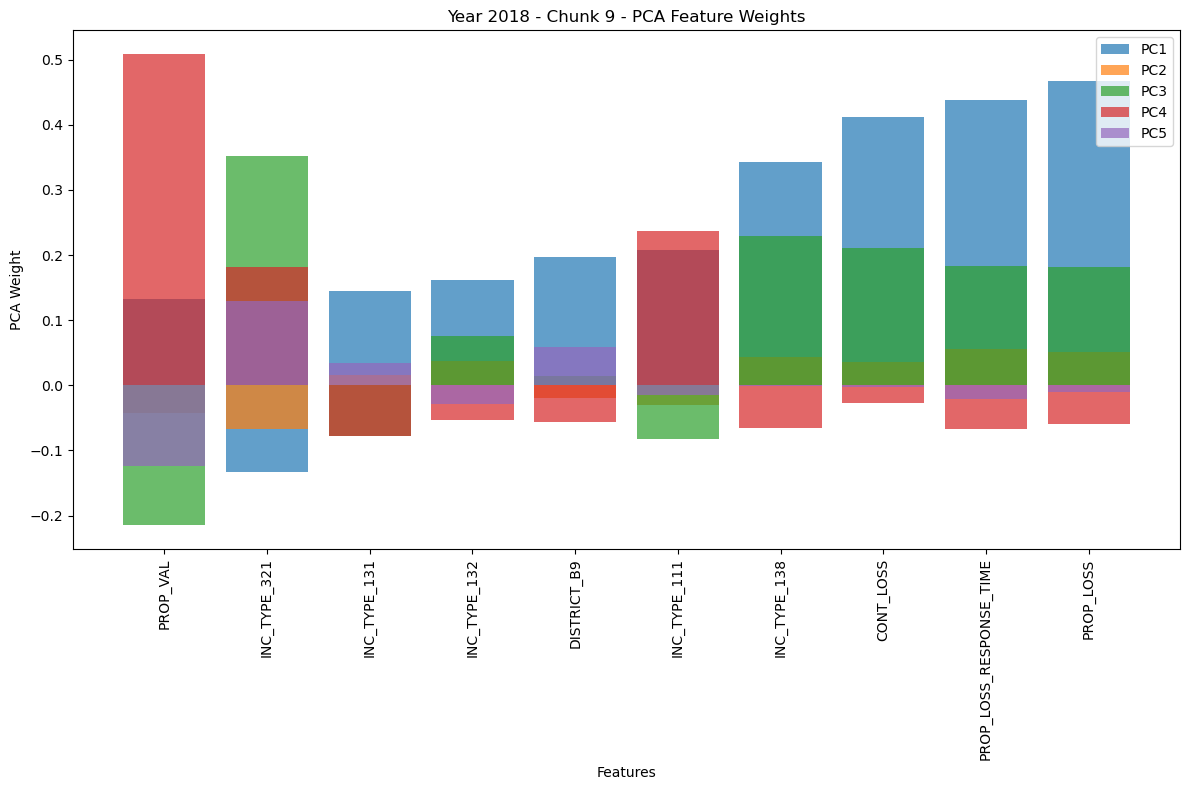

Explained variance by each principal component for chunk 9: [0.01213964 0.00988926 0.00875084 0.00828452 0.00719155]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (18,19,24,26,34,35,40,41,42,43,44,45,46,57,60,62,73,76,84,92,96,97,111,115,117,121,124,129,141,142,143,145,147,148,152,155,156,158,160,161,163,164,165,167,169,170,171,172,173,175,176,177,178,179,180,191,194,196,199,204,205,208,210,215,217,218,220,222,224,226,227,228,229,230,237,239,248,255,263,265,270,274,367,368,378,383,418,424,432,442,452,487,488,497,498,503,505,508,547,561,565,566,587,588,598,600,615,644,645,649,653,657,659,660,661,670,682,697,720,724,770,773,774,780,781,783,837,839,845,852,855,860,865,877,878,883,884,886,890,892,893,894,895,900,902,903,907,918,923,924,928,947,948,950,959,962,970,976,980,981,985,986,988,990,1002,1006,1087,1120,1122,1138,1140,1144,1145,1165,1170,1183,1184,1185,1186,1188,1191,1192,1193,1194,1195,1203,1204,1205,1222,1235,1242,1243,1245,1251,1260,1268,1269,1334,1351,1352,1354,1356,1358,1359,1367,1368,1369,1370,1373,1375,1377,1380,1381,1383,1384,1385,1386,1387,1399,1400,1404,1405,1427,1428,1431,14

Processing chunk 10


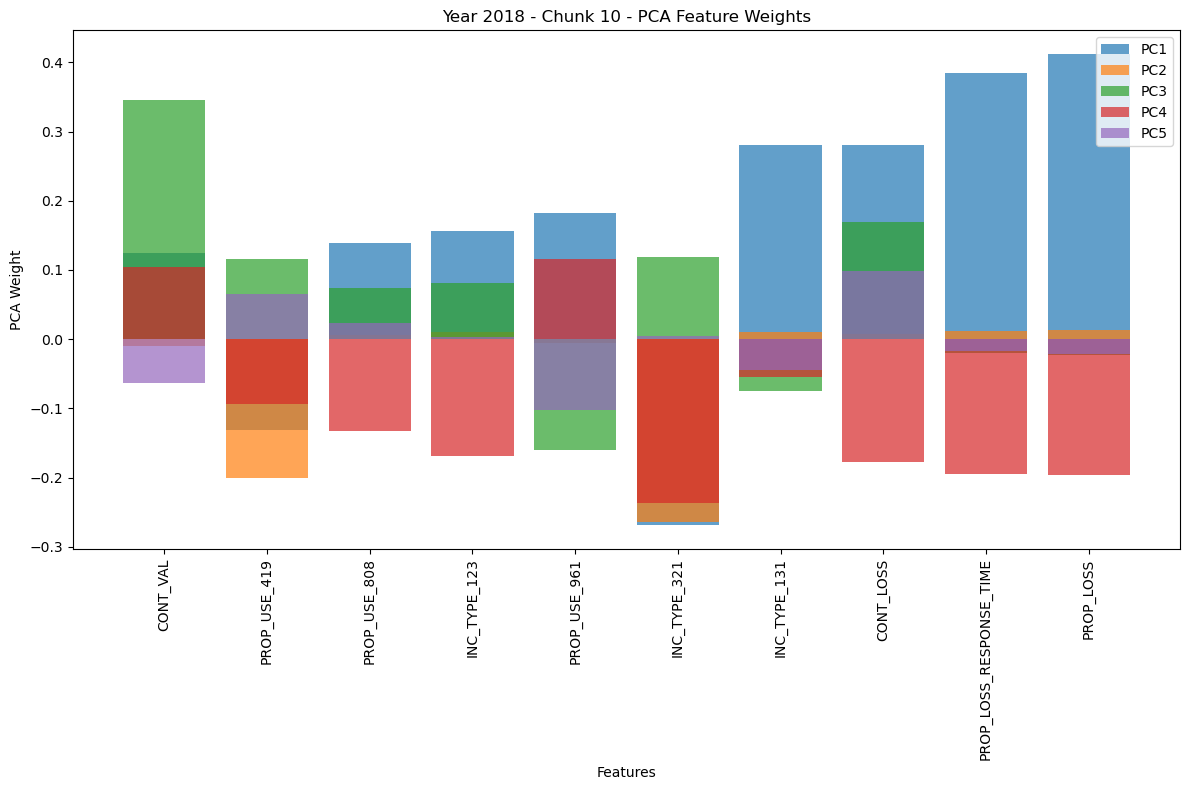

Explained variance by each principal component for chunk 10: [0.00480079 0.0043601  0.00375892 0.00359782 0.00342293]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (19,24,25,26,27,29,34,35,40,42,43,45,46,47,72,73,76,97,111,115,121,124,129,142,143,147,156,158,161,163,164,169,171,172,174,178,179,180,191,194,196,199,204,205,215,217,218,220,224,226,227,228,229,230,237,239,248,255,263,265,274,367,368,383,418,432,442,452,487,488,497,498,503,505,508,512,517,548,553,572,574,588,650,654,655,660,670,685,690,720,723,724,768,769,771,773,774,783,837,839,845,852,855,860,865,877,878,883,884,886,890,892,893,894,895,900,902,903,918,923,924,928,947,948,950,954,959,962,963,970,978,981,982,987,1002,1006,1061,1087,1097,1098,1099,1102,1118,1122,1138,1140,1144,1145,1165,1170,1175,1176,1183,1184,1185,1186,1188,1191,1192,1193,1194,1195,1203,1204,1205,1222,1228,1235,1243,1244,1251,1260,1268,1269,1334,1350,1351,1352,1354,1356,1358,1359,1364,1368,1369,1373,1375,1377,1380,1381,1383,1384,1385,1386,1387,1399,1400,1404,1405,1447,1454,1456,1457,1458,1459,1460,1461,1462,1470,1478,1479,1481,1483,1484,1485,1486,1487,1488,148

Processing chunk 11


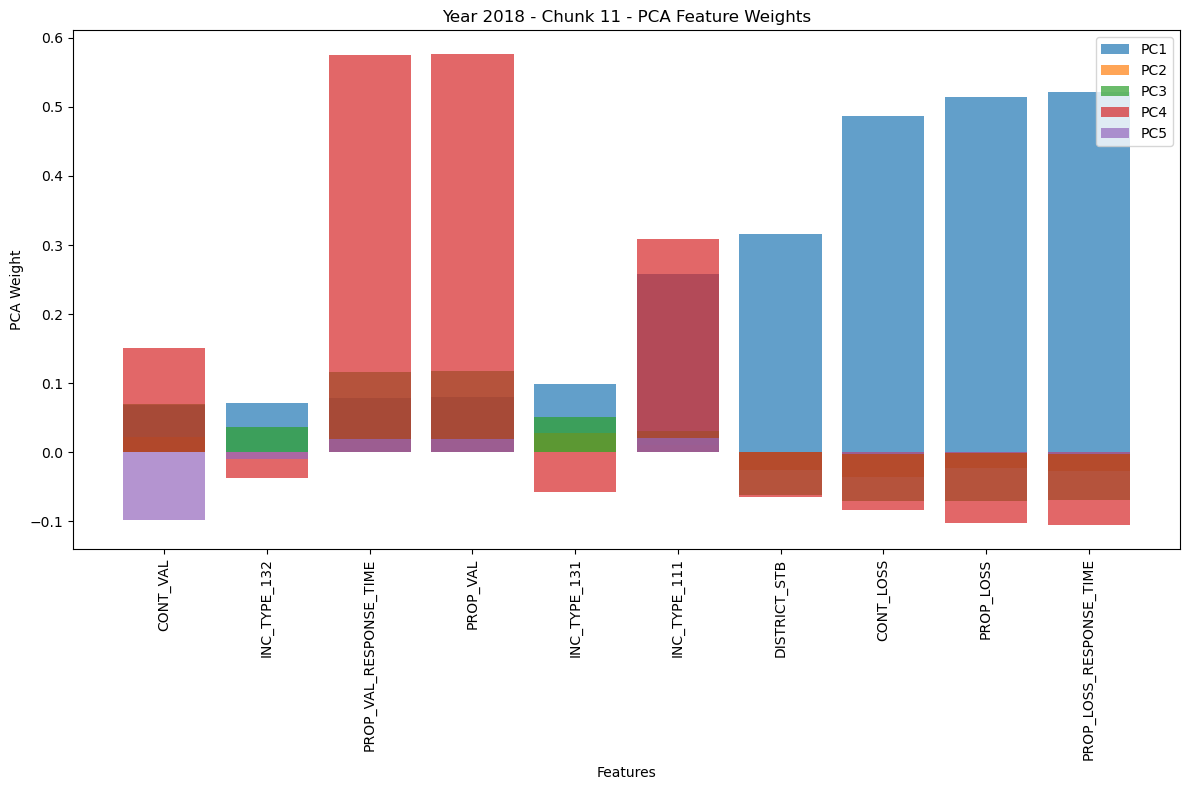

Explained variance by each principal component for chunk 11: [0.00947543 0.00701209 0.00670388 0.00654492 0.00597108]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (14,19,24,26,27,29,41,47,57,60,72,84,117,118,143,163,164,169,172,178,179,182,191,199,230,247,255,263,265,274,367,369,403,418,420,432,442,452,487,498,505,553,558,572,574,598,615,648,649,650,652,653,654,685,688,690,708,720,723,724,768,769,770,771,773,775,776,780,783,833,892,910,913,918,919,920,921,928,938,954,959,962,963,970,979,980,982,985,987,990,1021,1022,1037,1097,1099,1119,1175,1176,1192,1228,1242,1264,1350,1353,1445,1478,1480,1482,1587,1610,1628,1651,1665,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 12


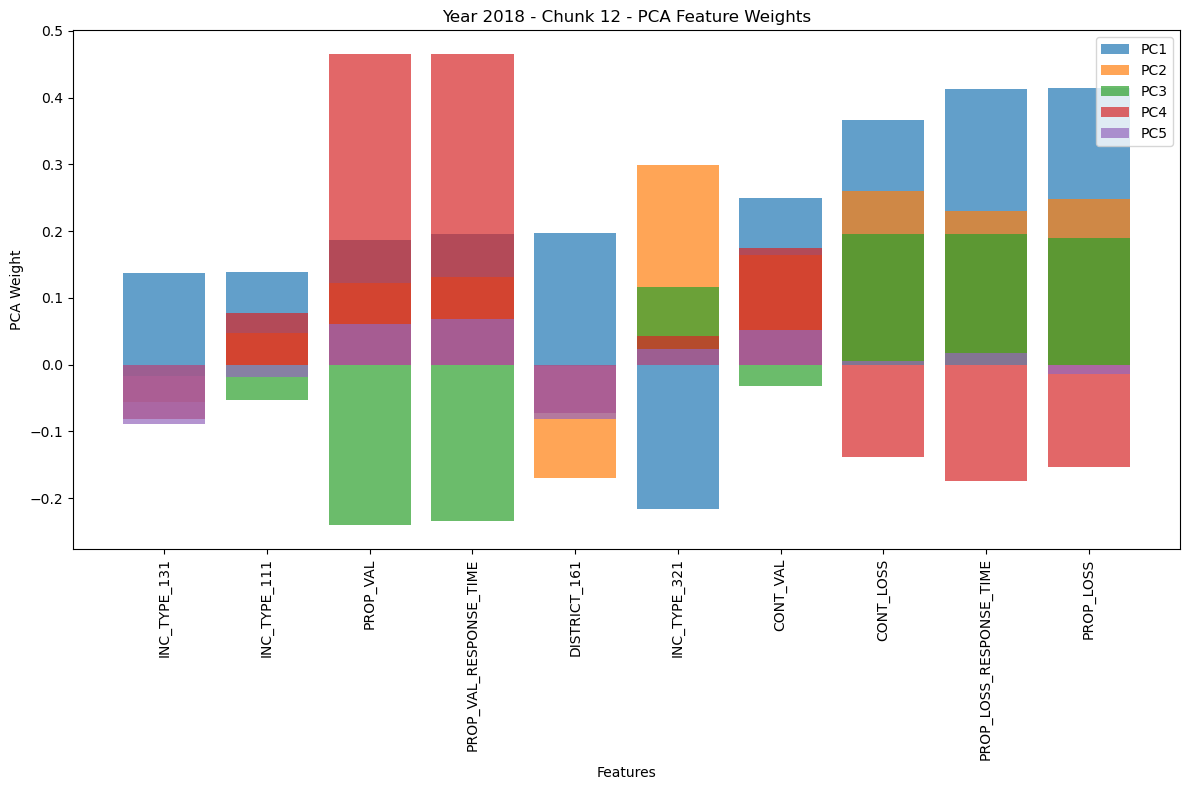

Explained variance by each principal component for chunk 12: [0.00885478 0.00718514 0.00662774 0.0063703  0.00497522]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,14,16,19,25,35,41,42,43,47,62,73,84,97,106,117,118,119,120,129,142,158,160,163,171,209,247,264,358,367,368,403,419,432,442,452,480,487,488,497,498,499,504,505,517,540,558,560,561,565,569,572,586,605,607,610,612,615,618,620,622,626,635,637,643,648,650,652,653,654,660,663,670,672,680,684,687,688,693,696,700,702,707,708,711,713,715,717,719,723,726,773,776,781,783,833,892,920,925,928,936,939,962,966,967,970,979,982,987,990,1037,1061,1097,1118,1119,1175,1189,1190,1196,1197,1262,1264,1346,1349,1352,1370,1383,1427,1428,1429,1445,1446,1448,1477,1478,1480,1481,1517,1558,1622,1626,1627,1656,1688,1689,1691,1692,1693,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,

Processing chunk 13


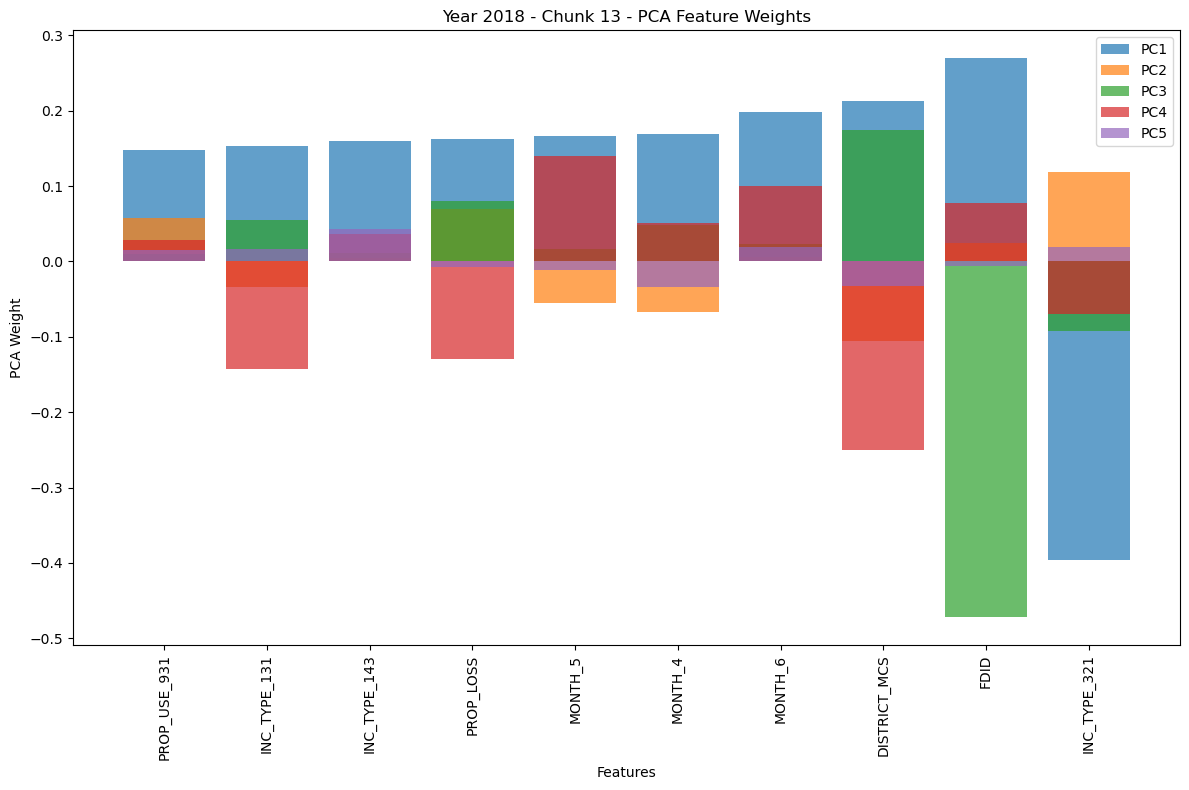

Explained variance by each principal component for chunk 13: [0.00657536 0.00533858 0.00530758 0.00474276 0.004208  ]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,16,18,19,27,38,41,42,43,44,47,76,97,106,119,120,129,141,143,145,148,152,155,158,164,165,167,169,170,172,173,175,176,177,178,179,182,191,199,208,210,222,230,255,263,265,270,274,358,369,378,418,420,424,480,497,504,517,540,547,550,553,558,560,569,576,586,588,600,605,607,610,612,618,620,622,626,628,635,637,643,650,653,654,655,657,660,661,663,666,672,684,687,693,694,696,700,702,707,708,711,713,715,717,719,720,721,723,726,728,730,731,741,770,773,775,781,783,907,910,913,918,919,921,925,936,938,939,956,957,959,966,967,976,977,978,980,981,987,988,990,1021,1022,1096,1100,1118,1175,1189,1190,1192,1196,1197,1243,1262,1346,1352,1353,1370,1383,1427,1428,1429,1446,1447,1448,1477,1478,1517,1558,1587,1622,1626,1627,1656,1687,1690,1694,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,17

Processing chunk 14


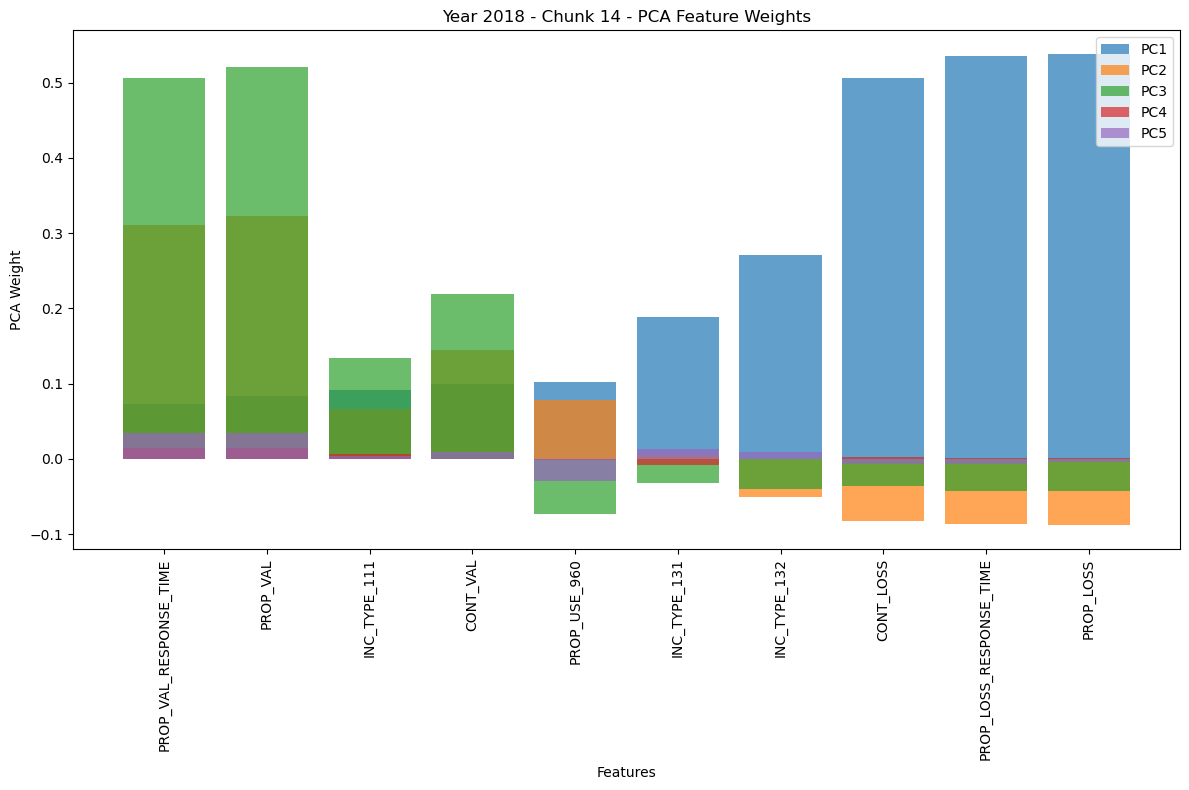

Explained variance by each principal component for chunk 14: [0.01157122 0.00855335 0.00812309 0.00729476 0.00712149]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,14,16,17,19,24,25,26,27,29,35,38,41,42,45,47,57,60,62,75,81,97,121,124,126,132,550,553,555,557,558,564,565,569,576,582,584,592,595,600,605,607,610,612,614,622,633,643,644,645,649,652,655,661,666,670,673,685,688,694,713,715,717,719,720,721,723,728,730,731,741,770,781,783,944,956,957,968,971,973,975,977,980,982,983,986,1096,1100,1119,1175,1176,1243,1244,1347,1349,1351,1352,1353,1354,1444,1445,1478,1482,1687,1689,1690,1694,1794,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 15


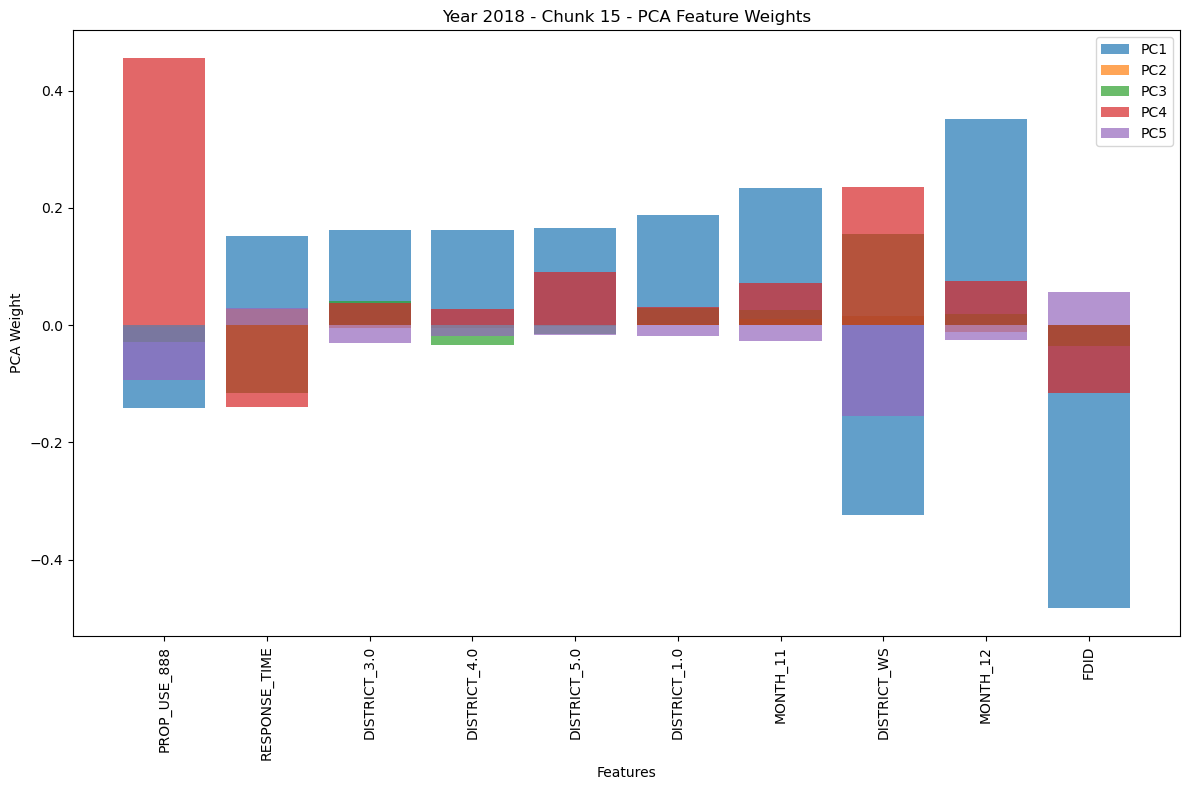

Explained variance by each principal component for chunk 15: [0.01087308 0.00835168 0.00658276 0.00635201 0.00624836]


/tmp/ipykernel_198/166897392.py:14: DtypeWarning: Columns (12,13,16,17,22,40,41,42,45,47,48,56,58,60,61,62,65,68,72,73,74,76,77,81,83,84,93,94,111,116,121,124,126,132,142,145,148,152,155,158,160,163,165,169,171,173,175,176,177,178,179,209,222,230,241,255,264,270,274,358,368,378,403,419,432,452,488,492,495,497,499,501,503,508,541,542,550,552,553,555,557,564,565,569,572,574,576,582,584,585,587,589,593,595,599,605,607,610,612,613,614,622,627,631,633,643,647,649,650,653,654,657,661,664,671,675,680,697,713,715,717,719,721,723,729,769,775,776,778,781,782,783,833,907,910,918,921,922,928,931,933,940,944,954,957,958,966,968,970,971,973,975,978,981,982,985,987,988,1006,1021,1022,1102,1118,1119,1176,1244,1347,1351,1352,1353,1354,1444,1447,1480,1481,1482,1485,1587,1643,1689,1690,1707,1798,1800,1803,1804,1805,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_index, chunk in enumerate(chunks):


Processing chunk 16


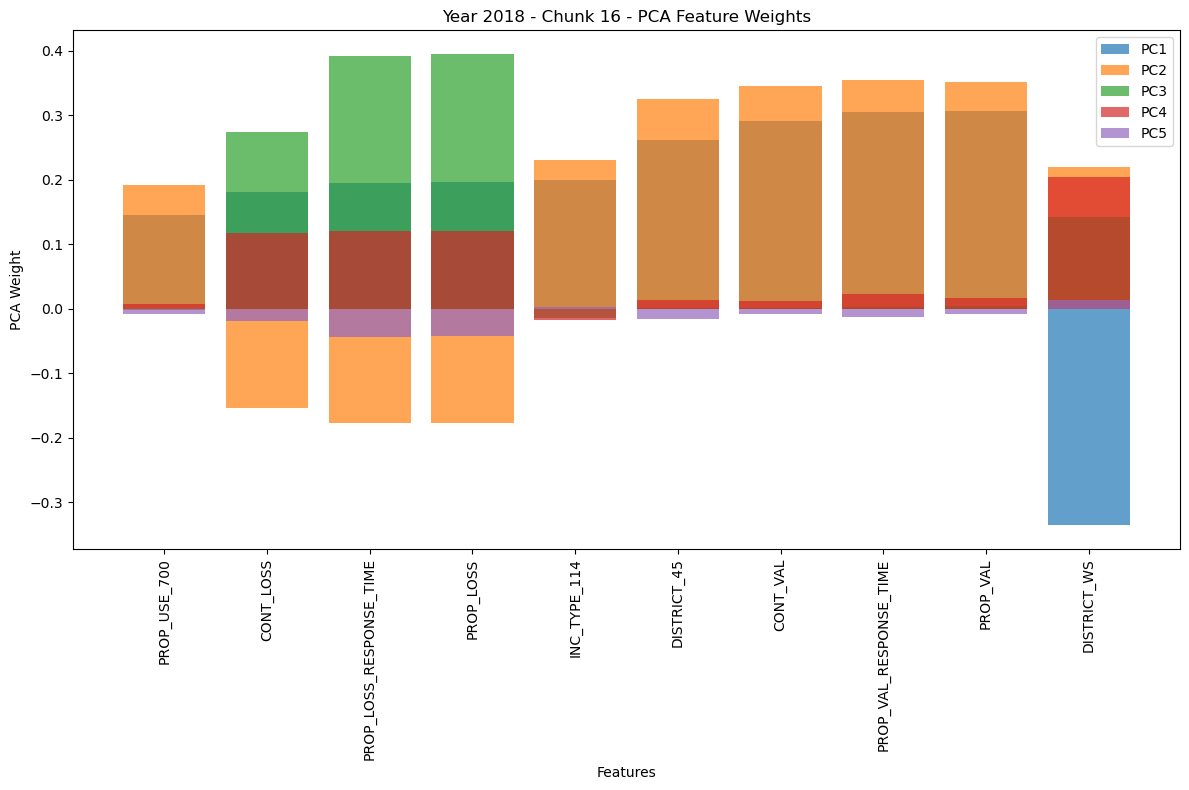

Explained variance by each principal component for chunk 16: [0.01619042 0.0148994  0.01158167 0.00940111 0.00878692]


FileNotFoundError: [Errno 2] No such file or directory: 'morans_data/2019/basicincident_processed_final_2019.csv'

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def pca_feature_analysis(year, chunk_size=10000, n_components=5):
    file_path = f'morans_data/{year}/basicincident_processed_final_{year}.csv'
    
    # 分块读取数据
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    
    for chunk_index, chunk in enumerate(chunks):
        print(f'Processing chunk {chunk_index + 1}')
        
        # 移除全为空的列
        chunk.dropna(axis=1, how='all', inplace=True)
        
        # 特征和目标变量
        features = [col for col in chunk.columns if col != 'FIRE_CLEARANCE_TIME']
        X = chunk[features]
        
        # 处理缺失值
        imputer = SimpleImputer(strategy='mean')  # 可以选择 'mean', 'median', 或 'most_frequent'
        X_imputed = imputer.fit_transform(X)
        
        # 数据标准化
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_imputed)
        
        # PCA分析
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)
        
        # 获取各主成分的权重
        pca_components = pca.components_
        
        # Limit the number of features displayed to top 10 based on the first principal component's weight
        top_features = np.argsort(np.abs(pca_components[0]))[-10:]
        
        plt.figure(figsize=(12, 8))
        for i in range(n_components):
            plt.bar(np.arange(len(top_features)), pca_components[i, top_features], alpha=0.7, align='center', label=f'PC{i+1}')

        plt.xticks(np.arange(len(top_features)), np.array(features)[top_features], rotation=90)
        plt.xlabel('Features')
        plt.ylabel('PCA Weight')
        plt.title(f'Year {year} - Chunk {chunk_index + 1} - PCA Feature Weights')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
        
        # 输出解释的方差比例
        explained_variance = pca.explained_variance_ratio_
        print(f'Explained variance by each principal component for chunk {chunk_index + 1}: {explained_variance}')

# 运行PCA分析
for year in range(2015, 2022):
    pca_feature_analysis(year)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model_in_chunks(year, chunk_size=10000):
    file_path = f'morans_data/{year}/basicincident_processed_final_{year}.csv'
    
    # 分块读取数据
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    
    total_feature_importances = None
    total_rmse = 0
    n_chunks = 0
    
    for chunk_index, chunk in enumerate(chunks):
        print(f'Processing chunk {chunk_index + 1}')
        
        # 移除全为空的列
        chunk.dropna(axis=1, how='all', inplace=True)
        
        # 特征和目标变量
        features = [col for col in chunk.columns if col != 'FIRE_CLEARANCE_TIME']
        X = chunk[features]
        y = chunk['FIRE_CLEARANCE_TIME']
        
        # 分割数据集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # 使用网格搜索调优随机森林的超参数
        param_grid = {
            'randomforestregressor__n_estimators': [50, 100],
            'randomforestregressor__max_depth': [None, 10],
            'randomforestregressor__min_samples_split': [2, 5],
            'randomforestregressor__min_samples_leaf': [1, 2]
        }
        
        # 创建pipeline
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('randomforestregressor', RandomForestRegressor(random_state=42))
        ])
        
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, error_score='raise')
        
        try:
            grid_search.fit(X_train, y_train)
        except Exception as e:
            print(f'Error during grid search: {e}')
            continue
        
        print(f'Best Parameters for chunk {chunk_index + 1}: {grid_search.best_params_}')
        
        # 使用最佳参数训练模型
        best_pipeline = grid_search.best_estimator_
        best_pipeline.fit(X_train, y_train)
        
        # 预测
        y_pred = best_pipeline.predict(X_test)
        
        # 评估模型
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        total_rmse += rmse
        n_chunks += 1
        
        print(f'Year {year} - Chunk {chunk_index + 1} - Root Mean Squared Error: {rmse}')
        
        # 累积特征重要性
        best_rf = best_pipeline.named_steps['randomforestregressor']
        feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
        if total_feature_importances is None:
            total_feature_importances = feature_importances
        else:
            total_feature_importances += feature_importances
    
    # 计算平均RMSE
    avg_rmse = total_rmse / n_chunks
    print(f'Year {year} - Average Root Mean Squared Error: {avg_rmse}')
    
    # 绘制累积的特征重要性
    plt.figure(figsize=(10, 6))
    total_feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Year {year} - Cumulative Feature Importances')
    plt.show()

# 训练和评估模型
for year in range(2019, 2020):
    train_and_evaluate_model_in_chunks(year)


FileNotFoundError: [Errno 2] No such file or directory: 'morans_data/2019/basicincident_processed_final_2019.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset
data = pd.read_csv('fire_incidents.csv')
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Moran's I
# Spatial weights matrix and Moran's I calculation
# ...

# K-means Clustering
kmeans = KMeans(n_clusters=5).fit(data[['feature1', 'feature2']])
data['kmeans_cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.countplot(y=data['kmeans_cluster'])
plt.title('Distribution of Fire Categories (K-means)')
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data[['feature1', 'feature2']])
data['dbscan_cluster'] = dbscan.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='dbscan_cluster')
plt.title('DBSCAN Clustering of Fire Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Random Forest Regression
X = data[['feature1', 'feature2', 'feature3']]
y = data['clearance_time']
model = RandomForestRegressor(n_estimators=100).fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(12, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance in Predicting Clearance Time')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_pred)
plt.title('Actual vs Predicted Clearance Time')
plt.xlabel('Actual Clearance Time')
plt.ylabel('Predicted Clearance Time')
plt.show()
